<a href="https://colab.research.google.com/github/ENKI0311/UFO-Sightings-Project/blob/main/UFO_Sightings_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFO Sightings

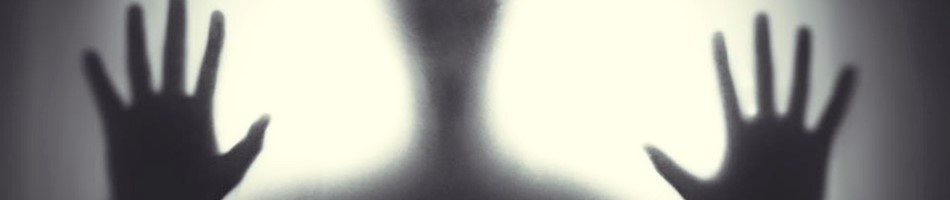

About Dataset
Context
This dataset contains over 80,000 reports of UFO sightings over the last century.

Content
There are two versions of this dataset: scrubbed and complete. The complete data includes entries where the location of the sighting was not found or blank (0.8146%) or have an erroneous or blank time (8.0237%). Since the reports date back to the 20th century, some older data might be obscured. Data contains city, state, time, description, and duration of each sighting.

Inspiration
What areas of the country are most likely to have UFO sightings?
Are there any trends in UFO sightings over time? Do they tend to be clustered or seasonal?
Do clusters of UFO sightings correlate with landmarks, such as airports or government research centers?
What are the most common UFO descriptions?
Acknowledgement
This dataset was scraped, geolocated, and time standardized from NUFORC data by Sigmond Axel here.

https://www.kaggle.com/datasets/NUFORC/ufo-sightings

https://github.com/planetsig/ufo-reports



# By: John Chilton

## Load the libraries

In [170]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Date and Time
from datetime import datetime

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Geospatial Data (Optional, if needed)
#import geopandas as gpd
#import folium

# Statistical Analysis (Optional, if needed)
#from scipy.stats import zscore
#import statsmodels.api as sm

# Matplotlib Settings for Better Visuals
plt.style.use('ggplot')

## Load Google Drive

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the datasets

In [172]:
df = pd.read_csv('/content/drive/MyDrive/lab_mount/UFO Sightings dataset 112022024/complete.csv', on_bad_lines='skip')

In [173]:
dfs = pd.read_csv('/content/drive/MyDrive/lab_mount/UFO Sightings dataset 112022024/scrubbed.csv')



*   Observation
*   Sanity Checks



In [174]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (88679, 11)


In [175]:
print(df.head())       # Preview the first few rows
print(df.info())       # Check data types and non-null values
print(df.describe())   # Get summary statistics for numerical columns

           datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008        53

In [176]:
df.isnull().sum()

datetime                    0
city                        0
state                    7409
country                 12365
shape                    2922
duration (seconds)          2
duration (hours/min)     3019
comments                   35
date posted                 0
latitude                    0
longitude                   0
dtype: int64

In [177]:
df.duplicated().sum()

0

In [178]:
df.nunique()

datetime                76159
city                    22018
state                      68
country                     5
shape                      29
duration (seconds)        732
duration (hours/min)     9791
comments                88283
date posted               317
latitude                25428
longitude               20549
dtype: int64

In [179]:
df.shape

(88679, 11)

In [180]:
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [181]:
df.describe()

longitude
count  88679.000000
mean     -85.021836
std       41.421744
min     -176.658056
25%     -112.073333
50%      -87.650000
75%      -77.769738
max      178.441900

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


In [183]:
df.tail()

datetime            city state country    shape  \
88674  9/9/2013 22:00            napa    ca      us    other   
88675  9/9/2013 22:20          vienna    va      us   circle   
88676  9/9/2013 23:00          edmond    ok      us    cigar   
88677  9/9/2013 23:00           starr    sc      us  diamond   
88678  9/9/2013 23:30  ft. lauderdale    fl      us     oval   

      duration (seconds) duration (hours/min)  \
88674             1200.0                 hour   
88675                5.0            5 seconds   
88676             1020.0           17 minutes   
88677                0.0             2 nights   
88678                0.0       still occuring   

                                                comments date posted  \
88674                                       Napa UFO&#44   9/30/2013   
88675  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
88676  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   
88677  On September ninth my wife and i noticed stran...   9/30/2013   
88678  Hovering object lit with red and white lights&...   9/30/2013   

        latitude   longitude  
88674  38.297222 -122.284444  
88675  38.901111  -77.265556  
88676  35.652778  -97.477778  
88677  34.376944  -82.695833  
88678  26.121944  -80.143611

In [184]:
df

datetime                  city state country     shape  \
0      10/10/1949 20:30            san marcos    tx      us  cylinder   
1      10/10/1949 21:00          lackland afb    tx     NaN     light   
2      10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3      10/10/1956 21:00                  edna    tx      us    circle   
4      10/10/1960 20:00               kaneohe    hi      us     light   
...                 ...                   ...   ...     ...       ...   
88674    9/9/2013 22:00                  napa    ca      us     other   
88675    9/9/2013 22:20                vienna    va      us    circle   
88676    9/9/2013 23:00                edmond    ok      us     cigar   
88677    9/9/2013 23:00                 starr    sc      us   diamond   
88678    9/9/2013 23:30        ft. lauderdale    fl      us      oval   

      duration (seconds) duration (hours/min)  \
0                   2700           45 minutes   
1                   7200              1-2 hrs   
2                     20           20 seconds   
3                     20             1/2 hour   
4                    900           15 minutes   
...                  ...                  ...   
88674             1200.0                 hour   
88675                5.0            5 seconds   
88676             1020.0           17 minutes   
88677                0.0             2 nights   
88678                0.0       still occuring   

                                                comments date posted  \
0      This event took place in early fall around 194...   4/27/2004   
1      1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005   
2      Green/Orange circular disc over Chester&#44 En...   1/21/2008   
3      My older brother and twin sister were leaving ...   1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   
...                                                  ...         ...   
88674                                       Napa UFO&#44   9/30/2013   
88675  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
88676  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   
88677  On September ninth my wife and i noticed stran...   9/30/2013   
88678  Hovering object lit with red and white lights&...   9/30/2013   

         latitude   longitude  
0      29.8830556  -97.941111  
1        29.38421  -98.581082  
2            53.2   -2.916667  
3      28.9783333  -96.645833  
4      21.4180556 -157.803611  
...           ...         ...  
88674   38.297222 -122.284444  
88675   38.901111  -77.265556  
88676   35.652778  -97.477778  
88677   34.376944  -82.695833  
88678   26.121944  -80.143611  

[88679 rows x 11 columns]

## Scrubbed Dataset

In [185]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [186]:
dfs.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [187]:
dfs.shape

(80332, 11)

In [188]:
dfs.describe()

longitude 
count  80332.000000
mean     -86.772885
std       39.697205
min     -176.658056
25%     -112.073333
50%      -87.903611
75%      -78.755000
max      178.441900

In [189]:
dfs.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [190]:
dfs.duplicated().sum()

0

In [191]:
dfs.nunique()

datetime                69586
city                    19900
state                      67
country                     5
shape                      29
duration (seconds)        706
duration (hours/min)     8349
comments                79997
date posted               317
latitude                23312
longitude               19455
dtype: int64

In [192]:
dfs.tail()

datetime       city state country   shape duration (seconds)  \
80327  9/9/2013 21:15  nashville    tn      us   light              600.0   
80328  9/9/2013 22:00      boise    id      us  circle             1200.0   
80329  9/9/2013 22:00       napa    ca      us   other             1200.0   
80330  9/9/2013 22:20     vienna    va      us  circle                5.0   
80331  9/9/2013 23:00     edmond    ok      us   cigar             1020.0   

      duration (hours/min)                                           comments  \
80327           10 minutes  Round from the distance/slowly changing colors...   
80328           20 minutes  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...   
80329                 hour                                       Napa UFO&#44   
80330            5 seconds  Saw a five gold lit cicular craft moving fastl...   
80331           17 minutes  2 witnesses 2  miles apart&#44 Red &amp; White...   

      date posted   latitude  longitude   
80327   9/30/2013  36.165833  -86.784444  
80328   9/30/2013  43.613611 -116.202500  
80329   9/30/2013  38.297222 -122.284444  
80330   9/30/2013  38.901111  -77.265556  
80331   9/30/2013  35.652778  -97.477778

In [193]:
dfs

datetime                  city state country     shape  \
0      10/10/1949 20:30            san marcos    tx      us  cylinder   
1      10/10/1949 21:00          lackland afb    tx     NaN     light   
2      10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3      10/10/1956 21:00                  edna    tx      us    circle   
4      10/10/1960 20:00               kaneohe    hi      us     light   
...                 ...                   ...   ...     ...       ...   
80327    9/9/2013 21:15             nashville    tn      us     light   
80328    9/9/2013 22:00                 boise    id      us    circle   
80329    9/9/2013 22:00                  napa    ca      us     other   
80330    9/9/2013 22:20                vienna    va      us    circle   
80331    9/9/2013 23:00                edmond    ok      us     cigar   

      duration (seconds) duration (hours/min)  \
0                   2700           45 minutes   
1                   7200              1-2 hrs   
2                     20           20 seconds   
3                     20             1/2 hour   
4                    900           15 minutes   
...                  ...                  ...   
80327              600.0           10 minutes   
80328             1200.0           20 minutes   
80329             1200.0                 hour   
80330                5.0            5 seconds   
80331             1020.0           17 minutes   

                                                comments date posted  \
0      This event took place in early fall around 194...   4/27/2004   
1      1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005   
2      Green/Orange circular disc over Chester&#44 En...   1/21/2008   
3      My older brother and twin sister were leaving ...   1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   
...                                                  ...         ...   
80327  Round from the distance/slowly changing colors...   9/30/2013   
80328  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...   9/30/2013   
80329                                       Napa UFO&#44   9/30/2013   
80330  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
80331  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   

         latitude  longitude   
0      29.8830556  -97.941111  
1        29.38421  -98.581082  
2            53.2   -2.916667  
3      28.9783333  -96.645833  
4      21.4180556 -157.803611  
...           ...         ...  
80327   36.165833  -86.784444  
80328   43.613611 -116.202500  
80329   38.297222 -122.284444  
80330   38.901111  -77.265556  
80331   35.652778  -97.477778  

[80332 rows x 11 columns]

In [194]:
missing_percentage = dfs.isnull().mean() * 100
print(missing_percentage)

datetime                 0.000000
city                     0.000000
state                    7.216302
country                 12.037544
shape                    2.405019
duration (seconds)       0.000000
duration (hours/min)     0.000000
comments                 0.018673
date posted              0.000000
latitude                 0.000000
longitude                0.000000
dtype: float64


In [195]:
from geopy.geocoders import Nominatim

# Fill 'state' based on most frequent value per city
dfs['state'] = dfs.groupby('city')['state'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown')

# Fill 'country' based on most frequent value per city
dfs['country'] = dfs.groupby('city')['country'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown')

# Fill 'shape' based on most frequent value per state
dfs['shape'] = dfs.groupby('state')['shape'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown')

# Fill 'comments' with a placeholder
dfs['comments'] = dfs['comments'].fillna('No comments available')


In [196]:
print(dfs.isnull().sum())

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
dtype: int64


In [197]:
print(dfs.columns)

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')


In [198]:
dfs.columns = dfs.columns.str.strip()

In [199]:
numerical_cols = ['duration (seconds)', 'latitude', 'longitude']  # Ensure correct column names

In [200]:
print(dfs.columns)

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')


In [201]:
for col in numerical_cols:
    dfs[col] = pd.to_numeric(dfs[col], errors='coerce')

In [202]:
dfs = dfs.dropna(subset=numerical_cols)

---

## EDA Analysis of UFO Sightings Dataset

With the missing values and duplicates handled, the next steps focus on exploring the dataset through **univariate** and **multivariate analysis**. This process will provide insights into the distribution of individual variables and the relationships between them.

### Univariate Analysis
The univariate analysis will examine each feature independently:
- **Numerical Variables**: Explore distributions, central tendencies, and outliers using histograms, density plots, and descriptive statistics.
- **Categorical Variables**: Identify the frequency of occurrences and explore dominant categories through bar plots.

### Multivariate Analysis
The multivariate analysis will uncover relationships between variables:
- **Numerical-Numerical Relationships**: Use scatterplots and correlation matrices to identify linear or non-linear trends.
- **Categorical-Numerical Relationships**: Leverage boxplots to analyze how numerical variables vary across categories.
- **Categorical-Categorical Relationships**: Utilize cross-tabulations and heatmaps to explore interactions between categorical features.

---



Going to just run with Data Frame dfs from this point.

# Univariate Analysis

Numerical Features

Visualizations: Use histograms, boxplots, or density plots to explore distributions.

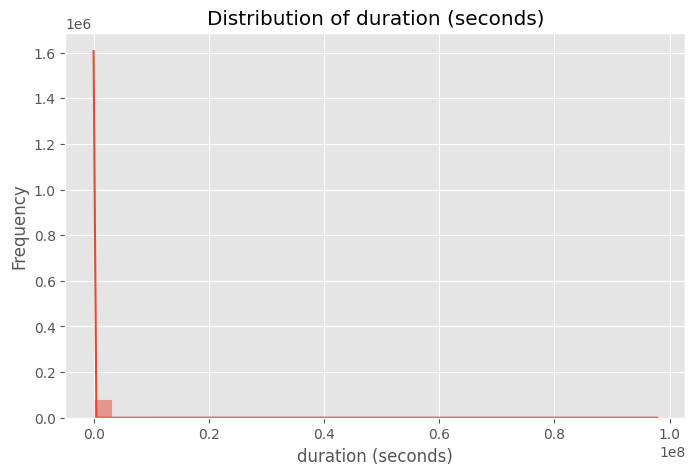

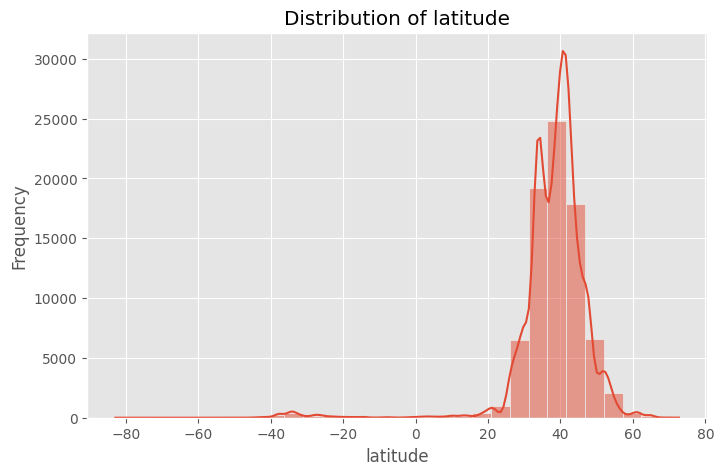

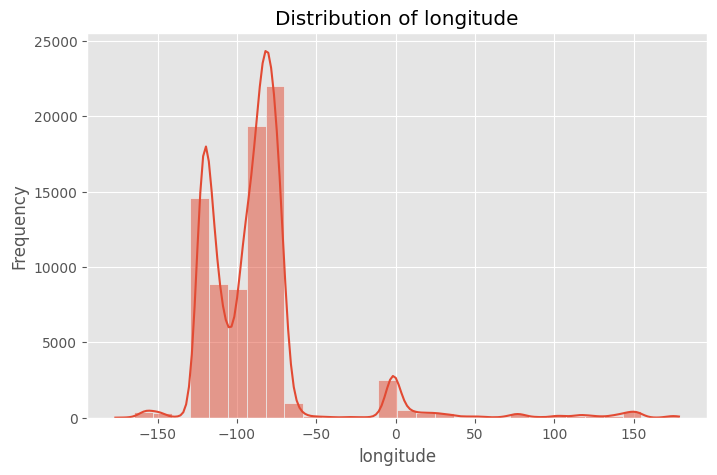

In [203]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(dfs[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Univariate Analysis: Categorical Features

For categorical variables like state, country, and shape, we can analyze the frequency distribution.

Plot Bar Charts for Categorical Variables


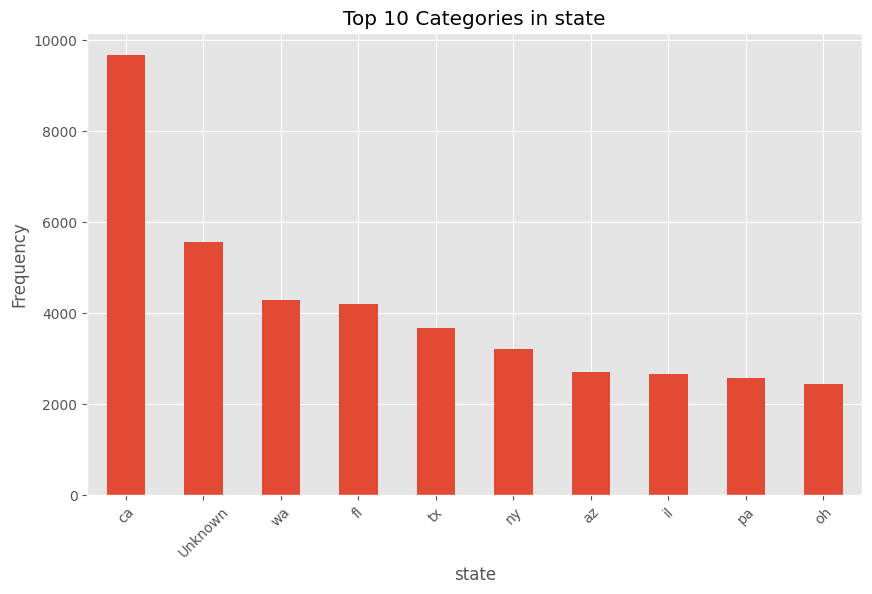

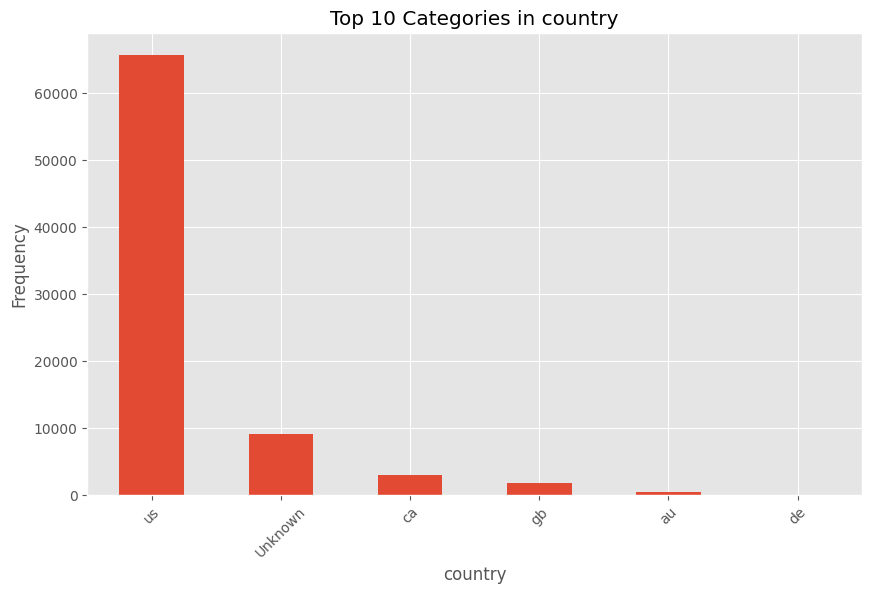

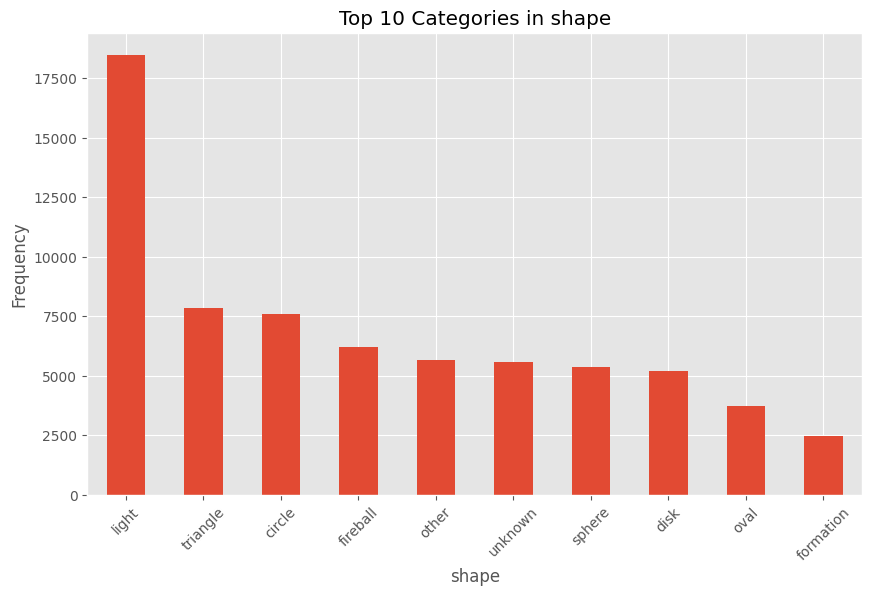

In [204]:
categorical_cols = ['state', 'country', 'shape']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    dfs[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 Categories in {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Outlier Detection (Numerical Data)
Outliers can significantly influence your analysis. Use boxplots to identify them.

Plot Boxplots for Numerical Features

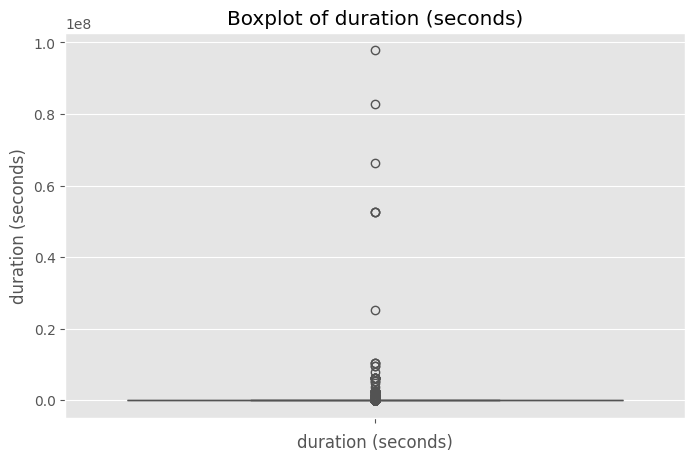

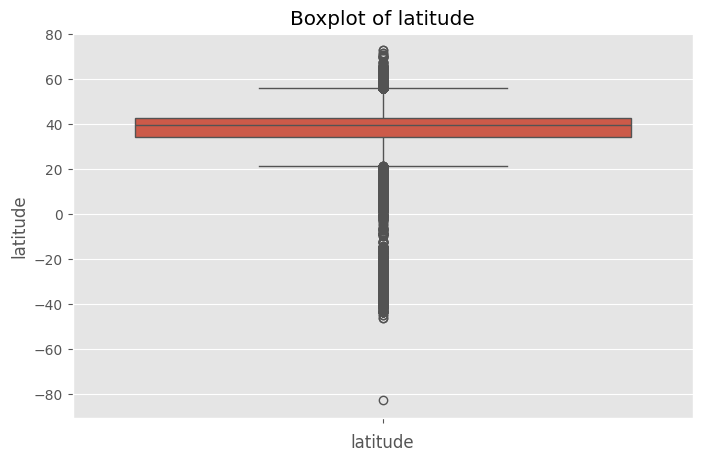

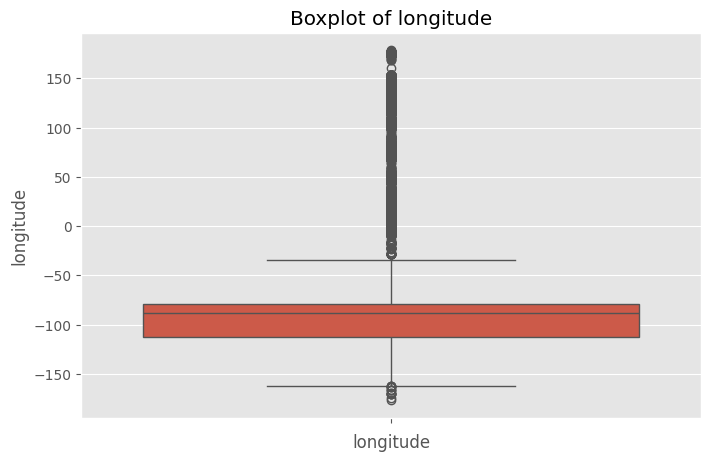

In [205]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(dfs[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

# Frequency Distribution of Categories
For categorical columns, create pie charts to show proportions.

Pie Charts for Categorical Features

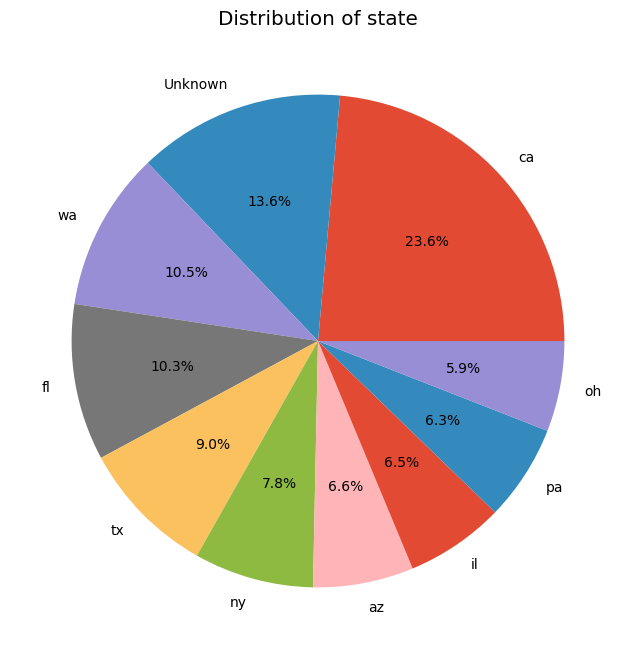

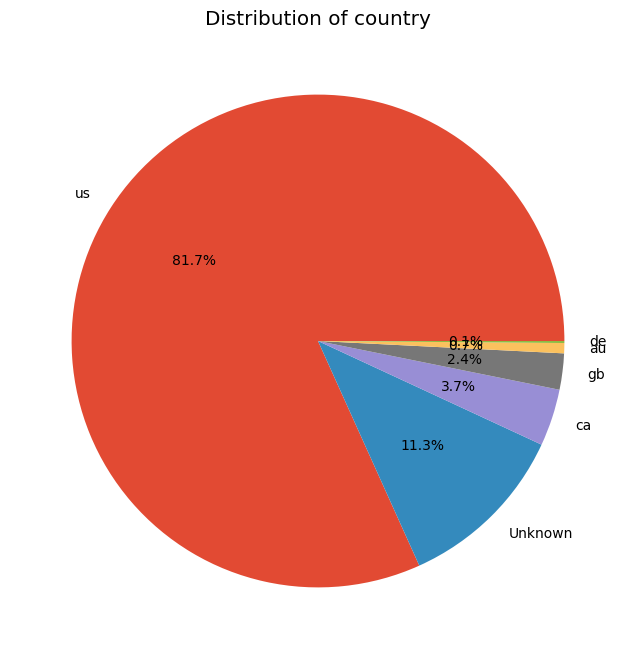

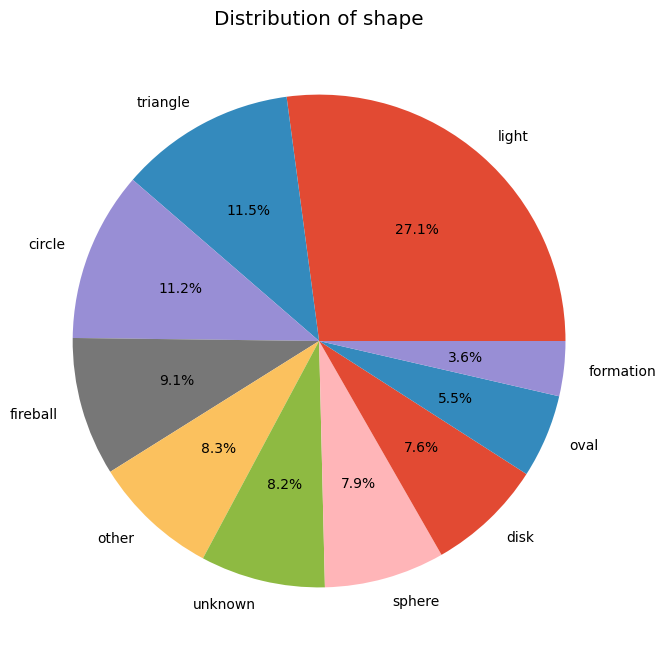

In [206]:
for col in categorical_cols:
    plt.figure(figsize=(8, 8))
    dfs[col].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
    plt.title(f"Distribution of {col}")
    plt.ylabel("")  # Remove y-axis label for better visuals
    plt.show()

# Time-Based Analysis
Analyze the datetime column for trends over time.

Convert to a Proper Datetime Format

In [207]:
dfs['datetime'] = pd.to_datetime(dfs['datetime'], errors='coerce')

Plot Frequency Over Time
Monthly Trends:

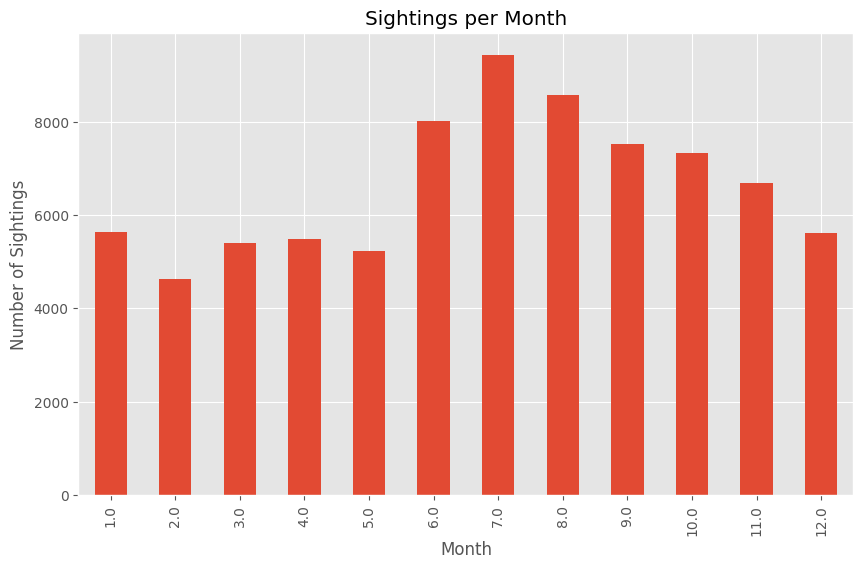

In [208]:
dfs['month'] = dfs['datetime'].dt.month
plt.figure(figsize=(10, 6))
dfs['month'].value_counts().sort_index().plot(kind='bar')
plt.title("Sightings per Month")
plt.xlabel("Month")
plt.ylabel("Number of Sightings")
plt.show()

# Yearly Trends:

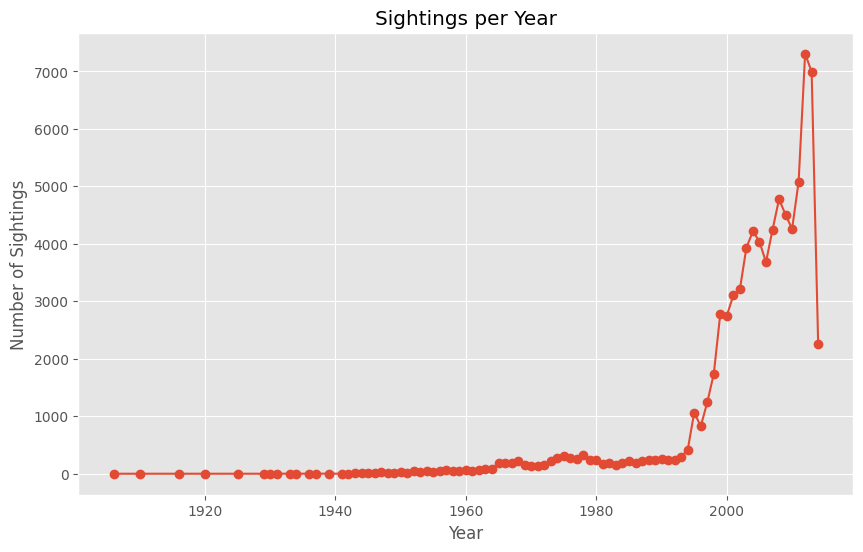

In [209]:
dfs['year'] = dfs['datetime'].dt.year
plt.figure(figsize=(10, 6))
dfs['year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Sightings per Year")
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.show()

# Duration Analysis
Analyze the duration (seconds) column to understand the distribution of UFO sighting durations.

Log Transformation for Better Visualization
If the duration values have a wide range, apply a log transformation:


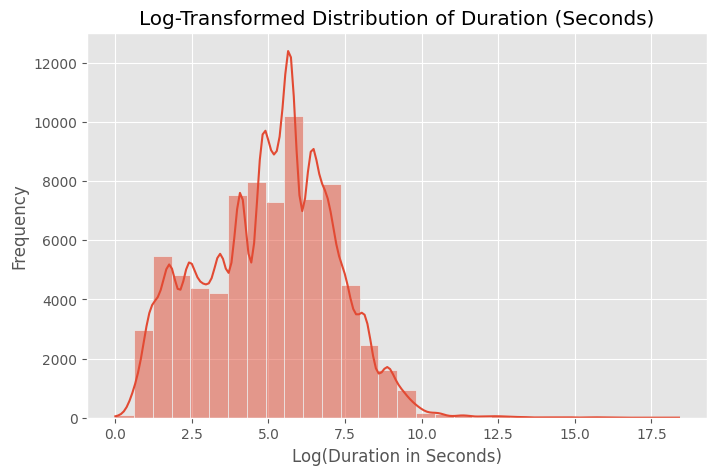

In [210]:
import numpy as np

dfs['log_duration'] = np.log1p(dfs['duration (seconds)'])

plt.figure(figsize=(8, 5))
sns.histplot(dfs['log_duration'], kde=True, bins=30)
plt.title("Log-Transformed Distribution of Duration (Seconds)")
plt.xlabel("Log(Duration in Seconds)")
plt.ylabel("Frequency")
plt.show()

# Text Data Analysis
Analyze the comments column for word frequency.

Word Cloud (Optional)

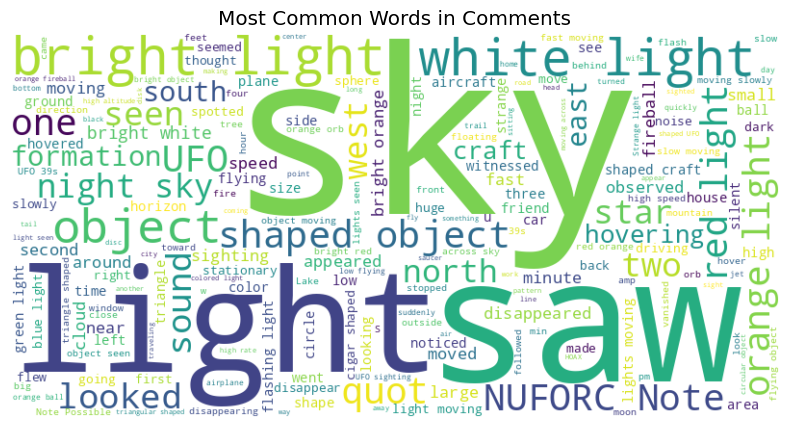

In [211]:
from wordcloud import WordCloud

text = " ".join(comment for comment in dfs['comments'] if isinstance(comment, str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Comments")
plt.show()

# Handle noticed Outliers in box plots

Use the interquartile range (IQR) method to identify and potentially remove outliers for more focused analysis:

In [212]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

dfs = remove_outliers(dfs, 'duration (seconds)')
dfs = remove_outliers(dfs, 'latitude')
dfs = remove_outliers(dfs, 'longitude')

Transform Skewed Data:

For the duration (seconds) column, apply a log transformation to reduce skewness:

In [213]:
dfs['log_duration'] = np.log1p(dfs['duration (seconds)'])

Validate Geospatial Data:

Confirm that all latitude values are between -90 and 90 and longitude values are between -180 and 180:


In [214]:
dfs = dfs[(dfs['latitude'] >= -90) & (dfs['latitude'] <= 90)]
dfs = dfs[(dfs['longitude'] >= -180) & (dfs['longitude'] <= 180)]

Replot the box plots to check skewness

In [215]:
from scipy.stats import skew

# Calculate skewness for numerical columns
for col in numerical_cols:
    skewness_value = skew(dfs[col].dropna())  # Drop NaN values to avoid issues
    print(f"Skewness of {col}: {skewness_value:.2f}")


Skewness of duration (seconds): 1.52
Skewness of latitude: -0.20
Skewness of longitude: -0.45


Observations from Skewness Values:
duration (seconds) (1.52):

Highly positively skewed: Long tail on the right, which aligns with the boxplot showing a few extreme outliers with very large durations.
latitude (-0.20):

Slightly negatively skewed: The distribution is almost symmetrical, so no immediate transformation is necessary.
longitude (-0.45):

Slightly negatively skewed: Similar to latitude, the distribution is relatively symmetrical, so it doesn't require immediate transformation.

# Recommended Actions
1. Handle Skewness for duration (seconds)
Since duration (seconds) is highly skewed, apply a log transformation to reduce the skewness:

In [216]:
import numpy as np

dfs['log_duration'] = np.log1p(dfs['duration (seconds)'])  # Use log1p to handle zeros

# Recalculate Skewness After Transformation
Verify if the log transformation reduced skewness:

In [217]:
log_skewness = skew(dfs['log_duration'].dropna())
print(f"Skewness of log-transformed duration (seconds): {log_skewness:.2f}")

Skewness of log-transformed duration (seconds): -0.43


Re-Plot the Distribution
After applying the transformation, re-plot the histogram and boxplot for log_duration:

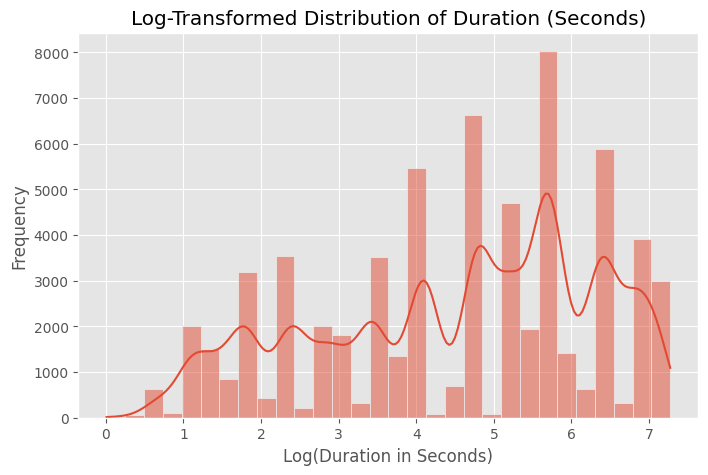

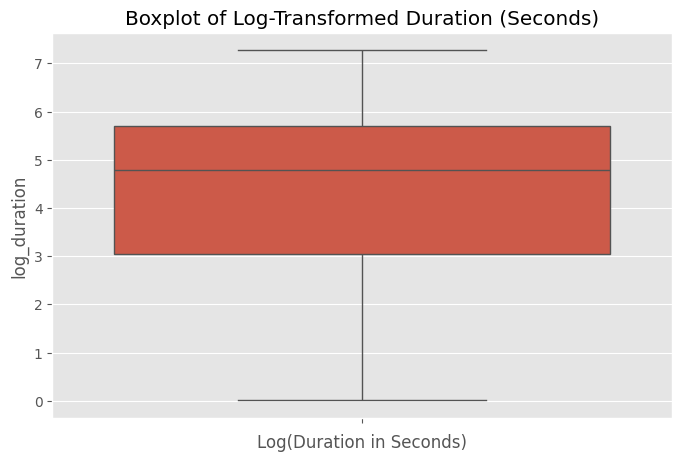

In [218]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(dfs['log_duration'], kde=True, bins=30)
plt.title("Log-Transformed Distribution of Duration (Seconds)")
plt.xlabel("Log(Duration in Seconds)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(dfs['log_duration'])
plt.title("Boxplot of Log-Transformed Duration (Seconds)")
plt.xlabel("Log(Duration in Seconds)")
plt.show()

Observations:
Histogram of Log-Transformed Duration:

The log transformation has compressed the extreme values, resulting in a distribution closer to normal.
Peaks in the distribution suggest clusters of UFO sightings with similar durations.
Boxplot of Log-Transformed Duration:

The outliers have been reduced, and the spread is now more manageable.
The median and interquartile range (IQR) are well-defined, allowing for clearer interpretation.

Next Steps:
With the improved distribution for duration (seconds), you can now:

Recalculate Skewness: Check if the skewness of the log-transformed data is closer to zero:

In [219]:
log_skewness = skew(dfs['log_duration'].dropna())
print(f"Skewness of log-transformed duration (seconds): {log_skewness:.2f}")

Skewness of log-transformed duration (seconds): -0.43


Observation on Skewness of Log-Transformed Duration:
Skewness: -0.43:
This indicates that the distribution is now slightly negatively skewed.
It's much closer to a symmetrical distribution compared to the original skewness (1.52).
The log transformation has effectively normalized the data, making it more suitable for further analysis.

Next Steps:
With the normalized log_duration, here’s what you can do next:

1. Multivariate Analysis
Explore relationships between variables, especially using the log-transformed duration (seconds).



# Multivariate Analysis

Correlation with Numerical Variables:

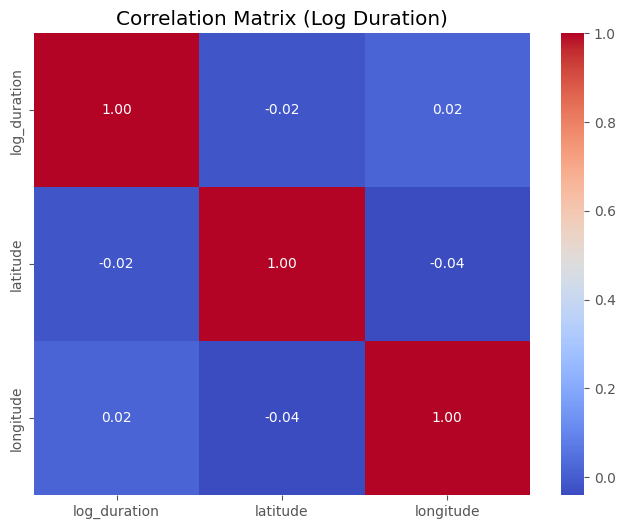

In [220]:
correlation_matrix = dfs[['log_duration', 'latitude', 'longitude']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Log Duration)')
plt.show()

Categorical-Numerical Relationships: Investigate how UFO shape or state affects the duration:

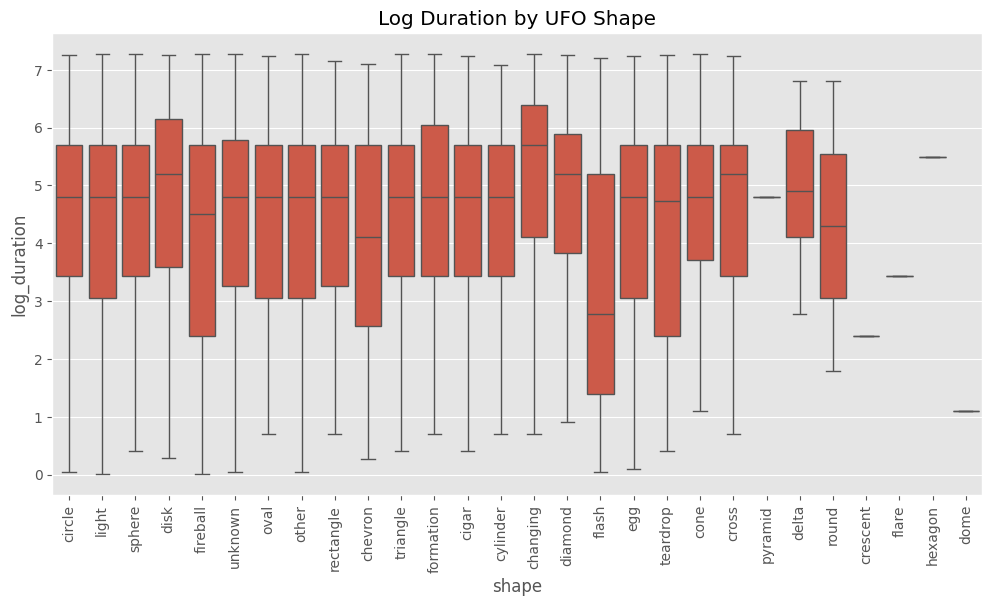

In [221]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfs, x='shape', y='log_duration', showfliers=False)
plt.xticks(rotation=90)
plt.title('Log Duration by UFO Shape')
plt.show()

Identify Clusters in Duration
Use clustering algorithms like K-means to find patterns in durations:

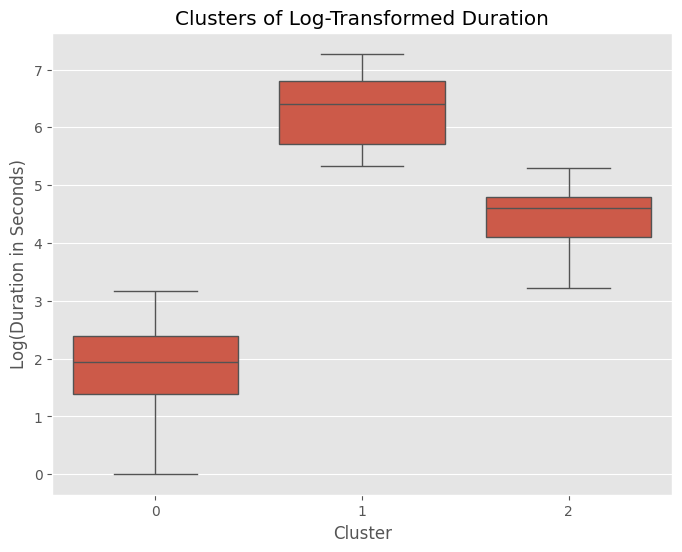

In [222]:
from sklearn.cluster import KMeans

# Use only log-transformed duration
kmeans = KMeans(n_clusters=3, random_state=42)
dfs['duration_cluster'] = kmeans.fit_predict(dfs[['log_duration']])

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.boxplot(data=dfs, x='duration_cluster', y='log_duration')
plt.title('Clusters of Log-Transformed Duration')
plt.xlabel('Cluster')
plt.ylabel('Log(Duration in Seconds)')
plt.show()

Geospatial Patterns
Map sightings by their latitude and longitude, colored by duration:

In [223]:
import folium

# Initialize map centered at mean coordinates
m = folium.Map(location=[dfs['latitude'].mean(), dfs['longitude'].mean()], zoom_start=4)

# Add sightings as points
for _, row in dfs.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Duration: {row['duration (seconds)']} sec"
    ).add_to(m)

# Display map
m.save('ufo_sightings_map.html')  # Save map to view locally

Temporal Trends: Analyze how sightings vary by month or year.

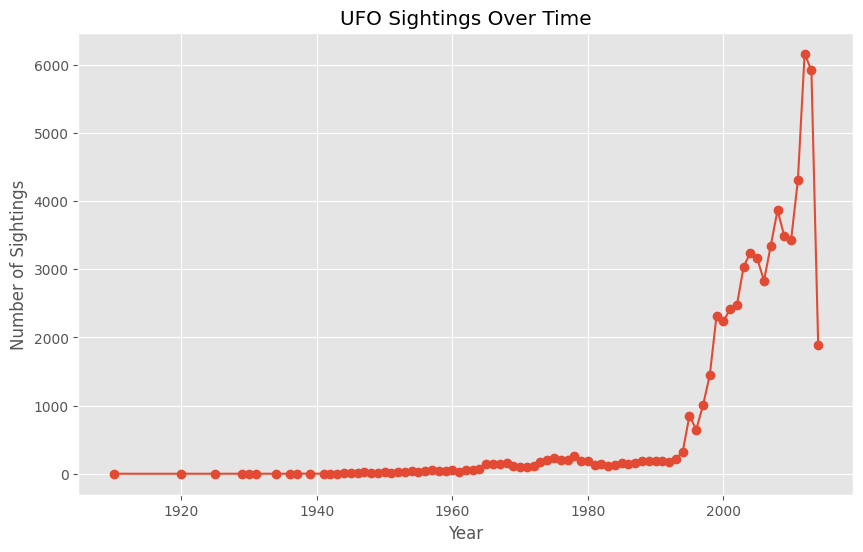

In [224]:
dfs['year'] = dfs['datetime'].dt.year
sightings_per_year = dfs.groupby('year').size()
plt.figure(figsize=(10, 6))
sightings_per_year.plot(kind='line', marker='o')
plt.title("UFO Sightings Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.show()

Deep Dive into Comments: Perform text analysis on the comments column to extract trends or frequently mentioned words (e.g., "lights," "triangle").

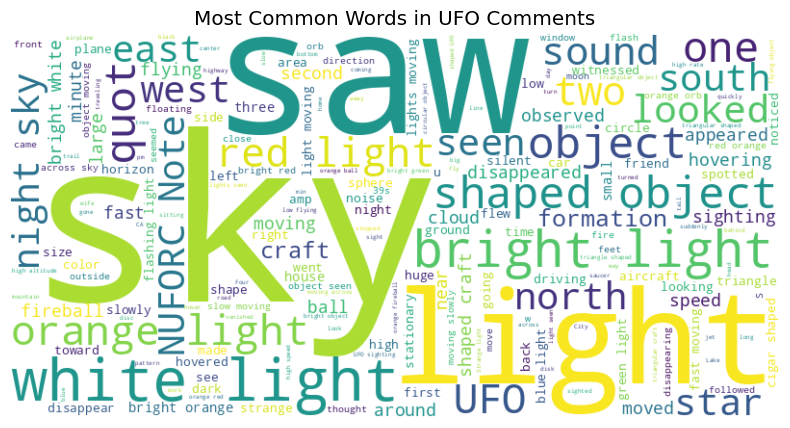

In [225]:
from wordcloud import WordCloud

text = " ".join(comment for comment in dfs['comments'] if isinstance(comment, str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in UFO Comments")
plt.show()

Pairplot
Visualize pairwise relationships between numerical variables.

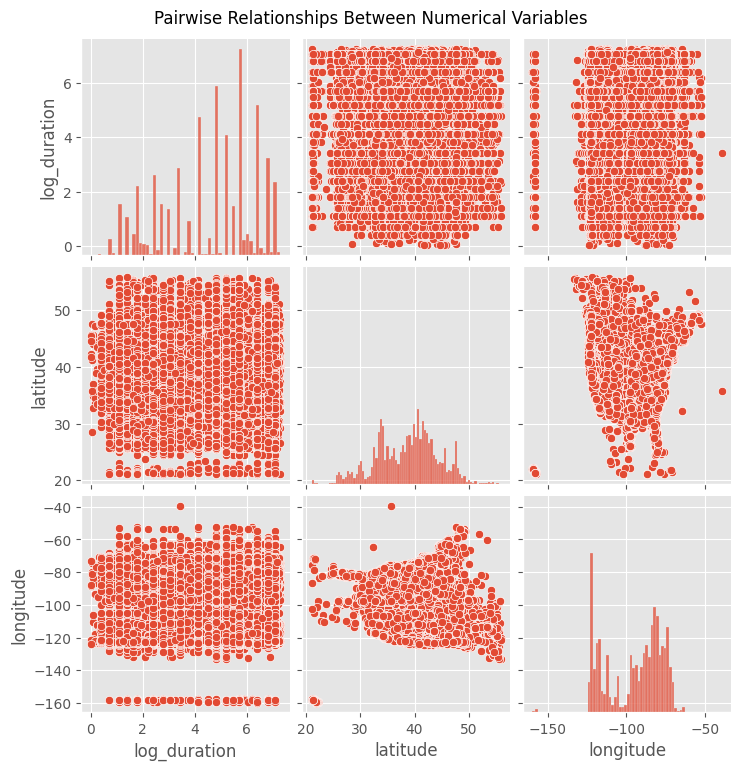

In [226]:
sns.pairplot(dfs[['log_duration', 'latitude', 'longitude']])
plt.suptitle('Pairwise Relationships Between Numerical Variables', y=1.02)
plt.show()

Heatmap for Categorical-Numerical Relationships
Analyze the average log_duration for combinations of categorical variables like state and shape.

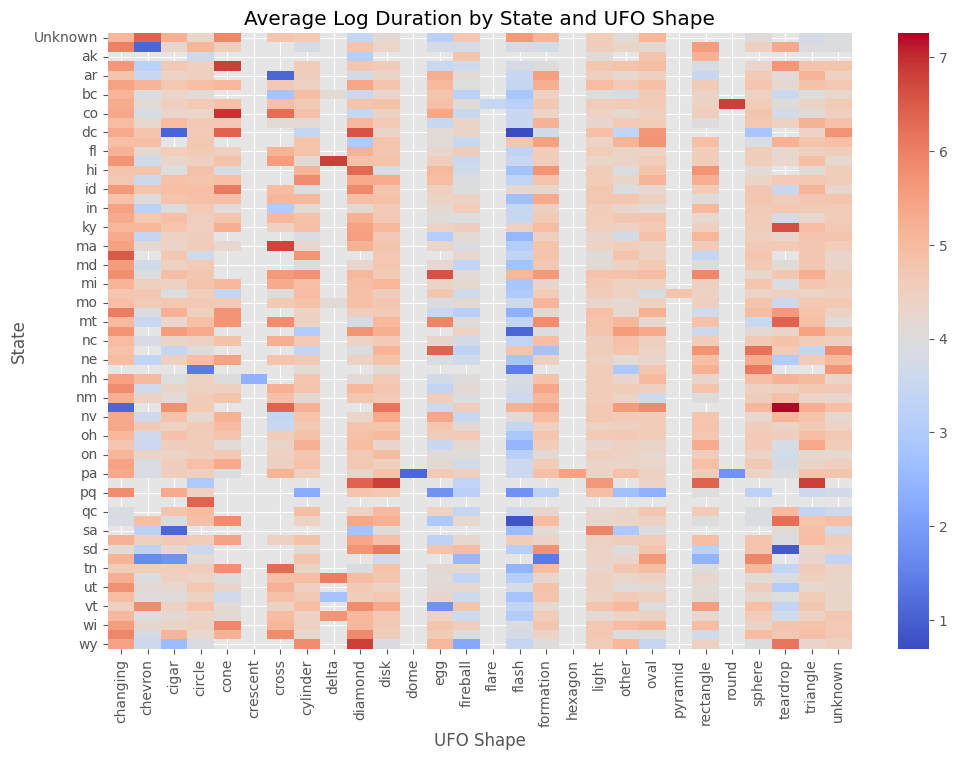

In [227]:
heatmap_data = dfs.pivot_table(index='state', columns='shape', values='log_duration', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar=True)
plt.title('Average Log Duration by State and UFO Shape')
plt.xlabel('UFO Shape')
plt.ylabel('State')
plt.show()

Scatterplot with Hue
Add a third dimension to a scatterplot by coloring points based on a categorical variable like shape or country.

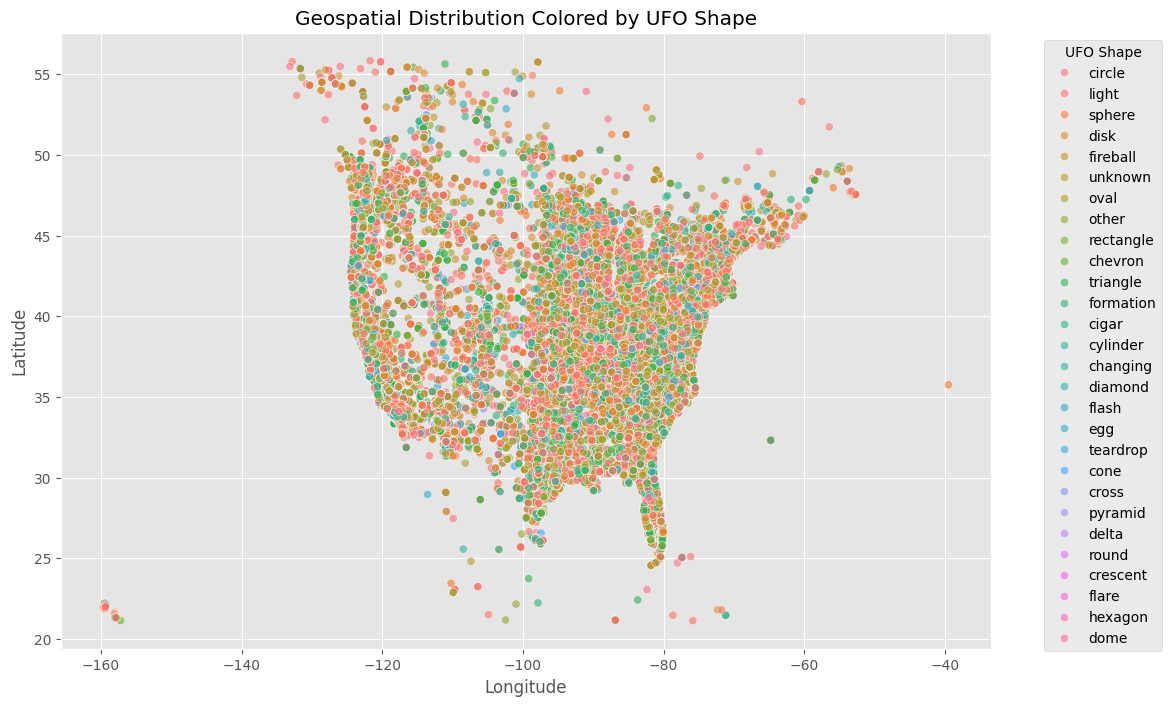

In [228]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dfs, x='longitude', y='latitude', hue='shape', alpha=0.6)
plt.title('Geospatial Distribution Colored by UFO Shape')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='UFO Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Boxplot for Multiple Categories
Compare log_duration across combinations of multiple categorical variables.


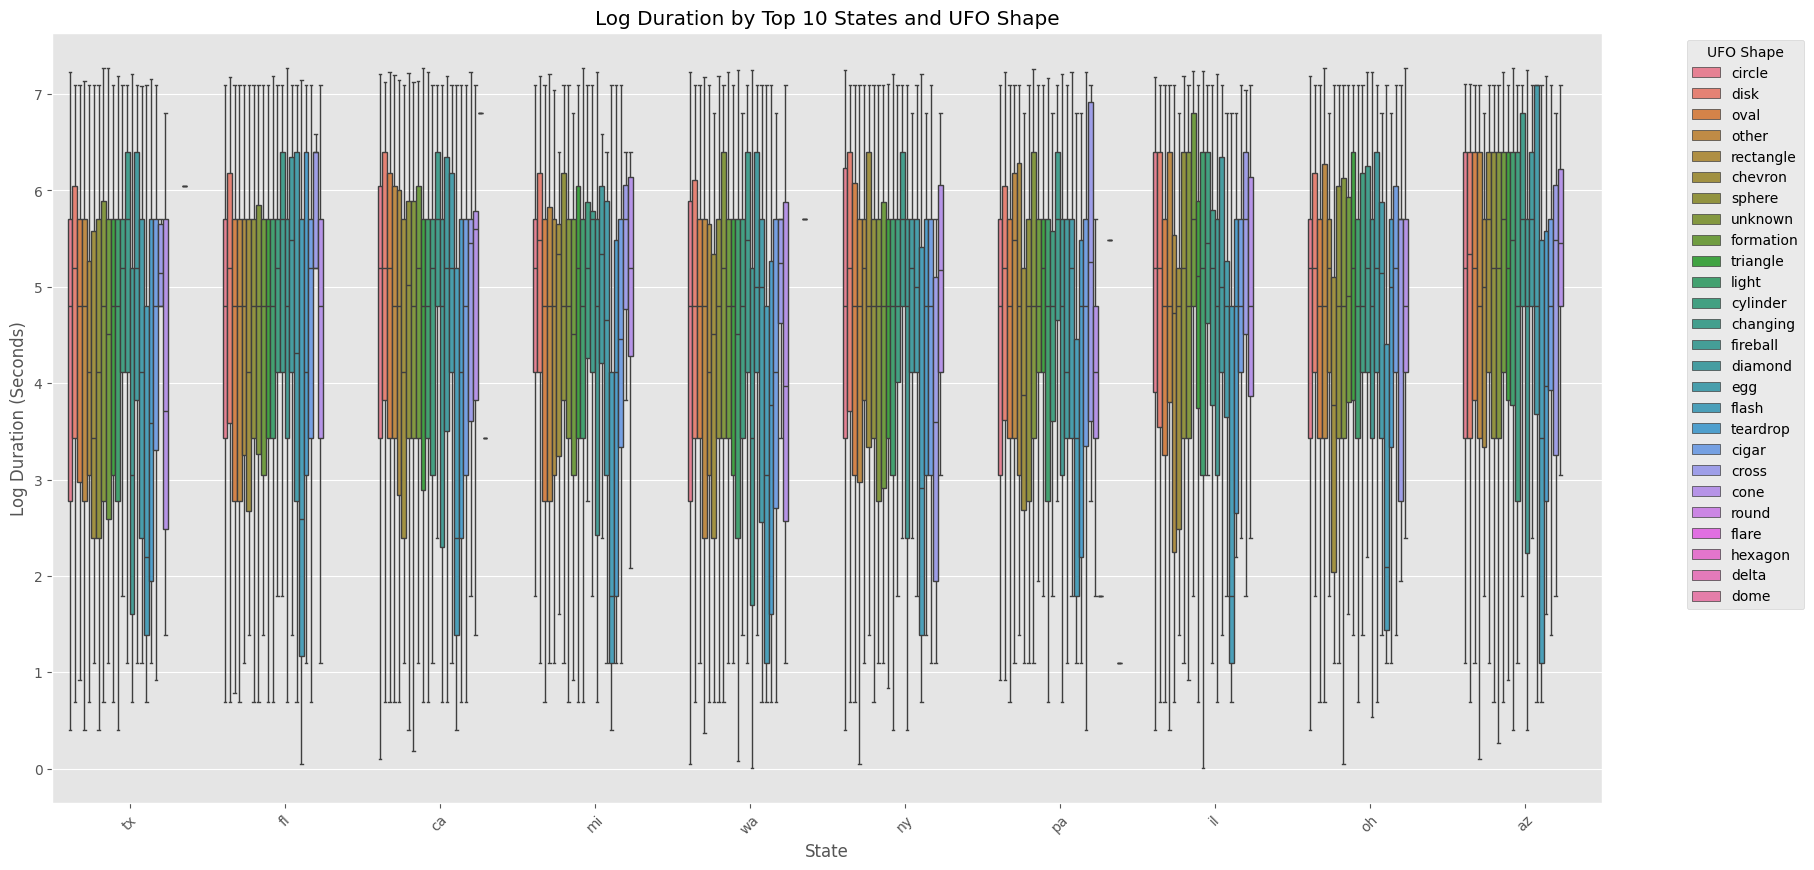

In [229]:
# Select top 10 states by number of sightings
top_states = dfs['state'].value_counts().head(10).index
filtered_data = dfs[dfs['state'].isin(top_states)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_data, x='state', y='log_duration', hue='shape', showfliers=False)
plt.xticks(rotation=45)
plt.title('Log Duration by Top 10 States and UFO Shape')
plt.xlabel('State')
plt.ylabel('Log Duration (Seconds)')
plt.legend(title='UFO Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Analyze only the most common shapes to simplify the chart:

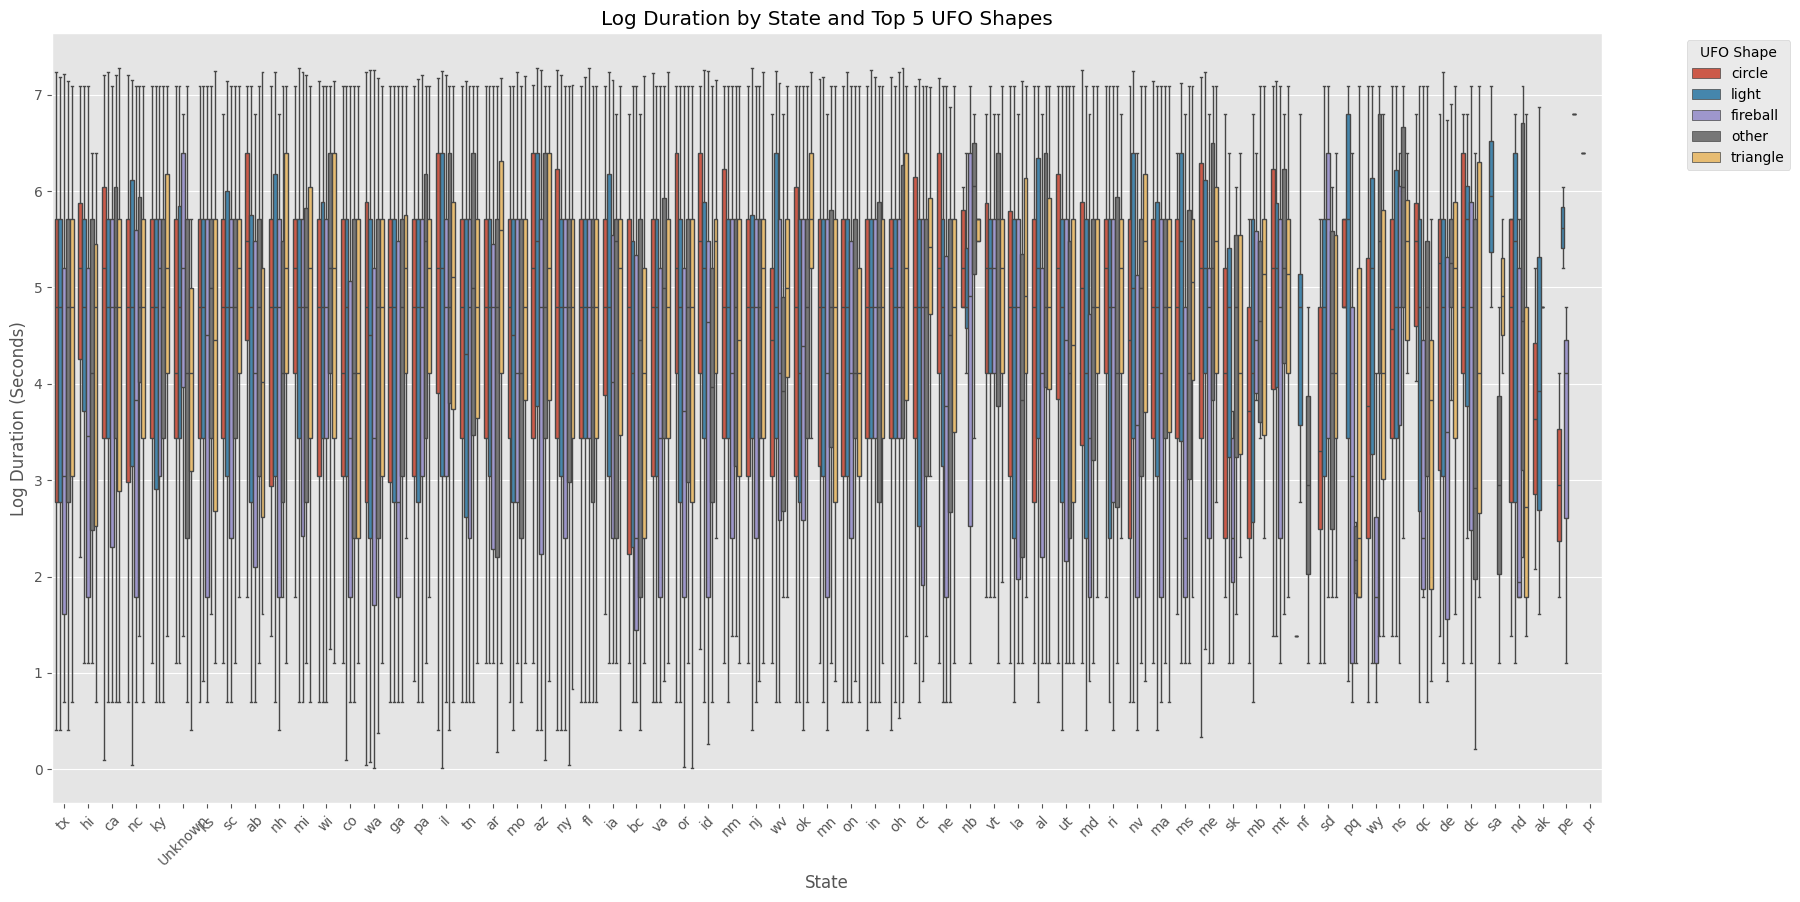

In [230]:
# Select top 5 shapes by frequency
top_shapes = dfs['shape'].value_counts().head(5).index
filtered_data = dfs[dfs['shape'].isin(top_shapes)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_data, x='state', y='log_duration', hue='shape', showfliers=False)
plt.xticks(rotation=45)
plt.title('Log Duration by State and Top 5 UFO Shapes')
plt.xlabel('State')
plt.ylabel('Log Duration (Seconds)')
plt.legend(title='UFO Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 Separate Plots for Each Shape
Create smaller charts for each UFO shape using a FacetGrid:

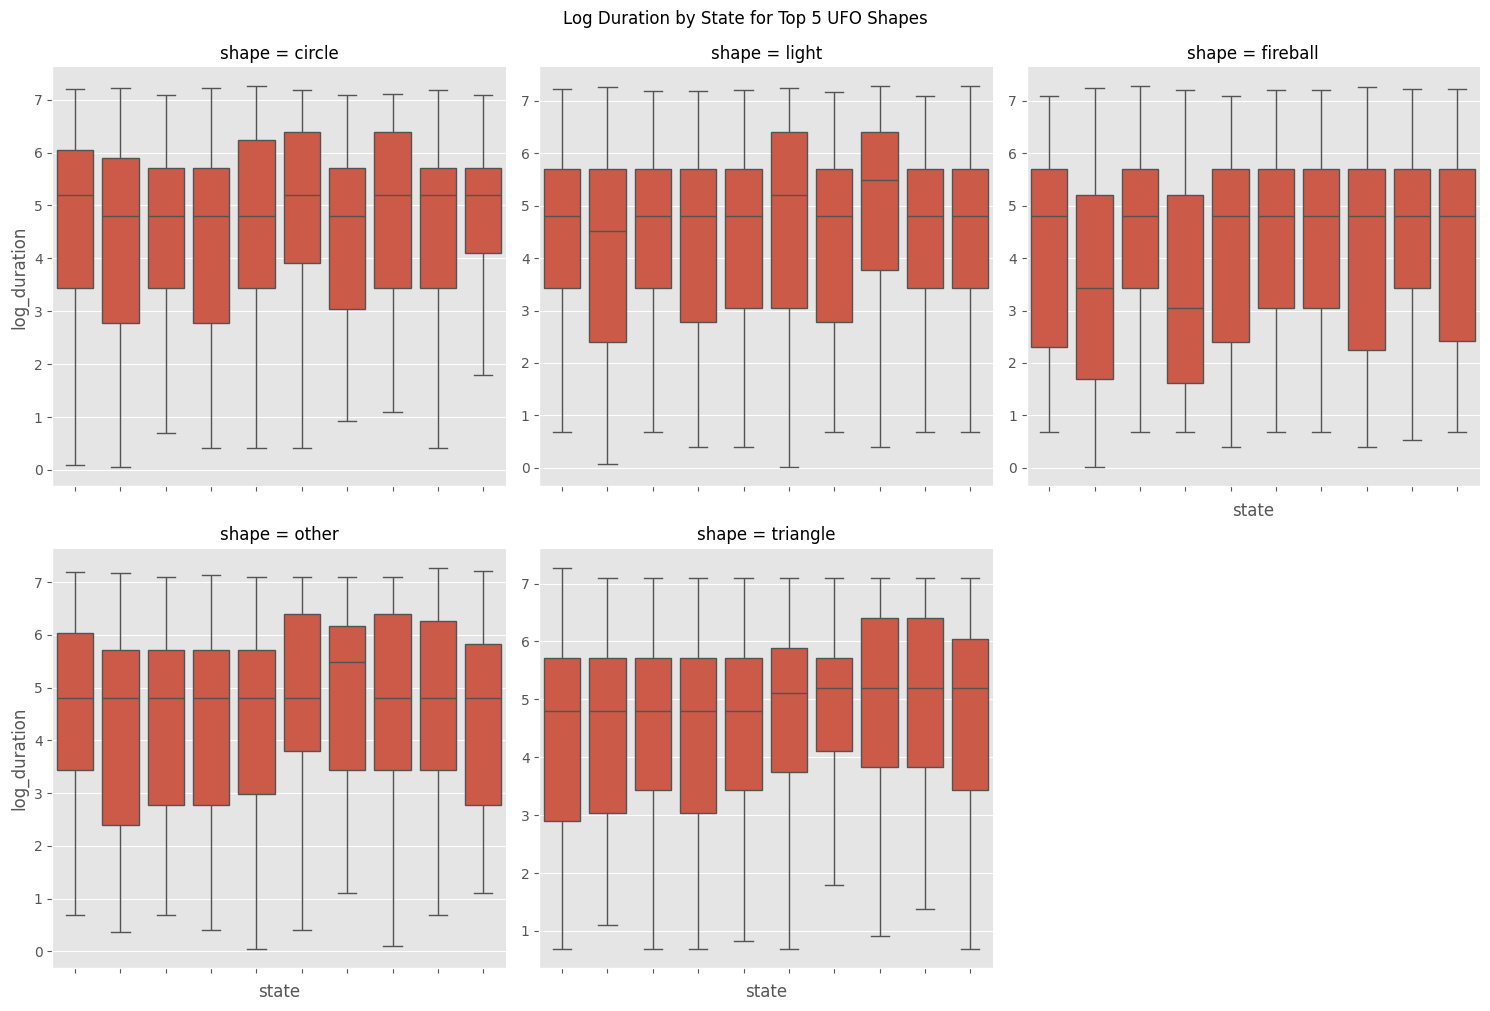

In [231]:
# Limit to the top 5 most common shapes
top_shapes = dfs['shape'].value_counts().head(5).index
filtered_data = dfs[dfs['shape'].isin(top_shapes)]

g = sns.FacetGrid(filtered_data, col="shape", col_wrap=3, height=5, sharey=False)
g.map(sns.boxplot, "state", "log_duration", order=top_states, showfliers=False)
g.set_xticklabels(rotation=90)
g.fig.suptitle("Log Duration by State for Top 5 UFO Shapes", y=1.02)
plt.show()

Violin Plot
A combination of boxplot and KDE (Kernel Density Estimate) to visualize the distribution of log_duration by shape or state.

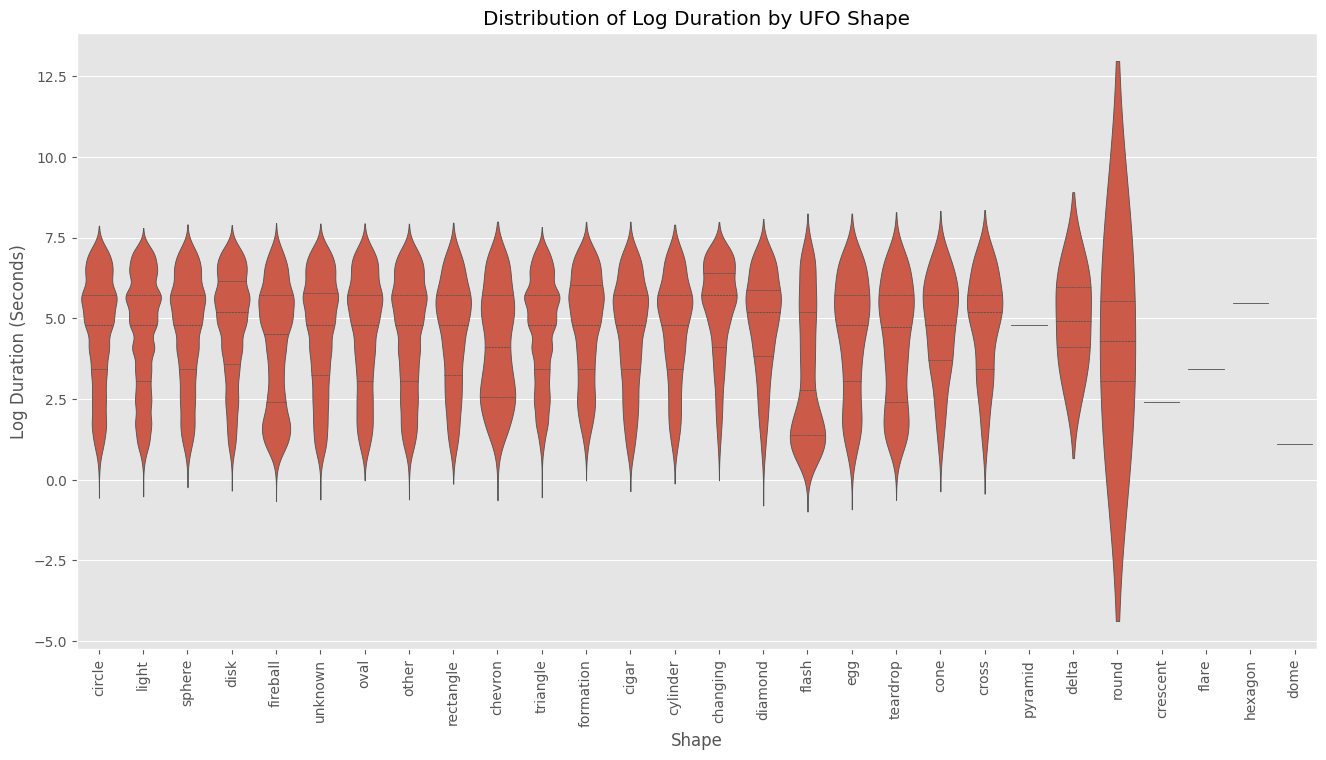

In [232]:
plt.figure(figsize=(16, 8))
sns.violinplot(data=dfs, x='shape', y='log_duration', scale='width', inner='quartile')
plt.xticks(rotation=90)
plt.title('Distribution of Log Duration by UFO Shape')
plt.xlabel('Shape')
plt.ylabel('Log Duration (Seconds)')
plt.show()

FacetGrid
Create a grid of plots to analyze a numerical variable (log_duration) across multiple categorical variables (shape or state).

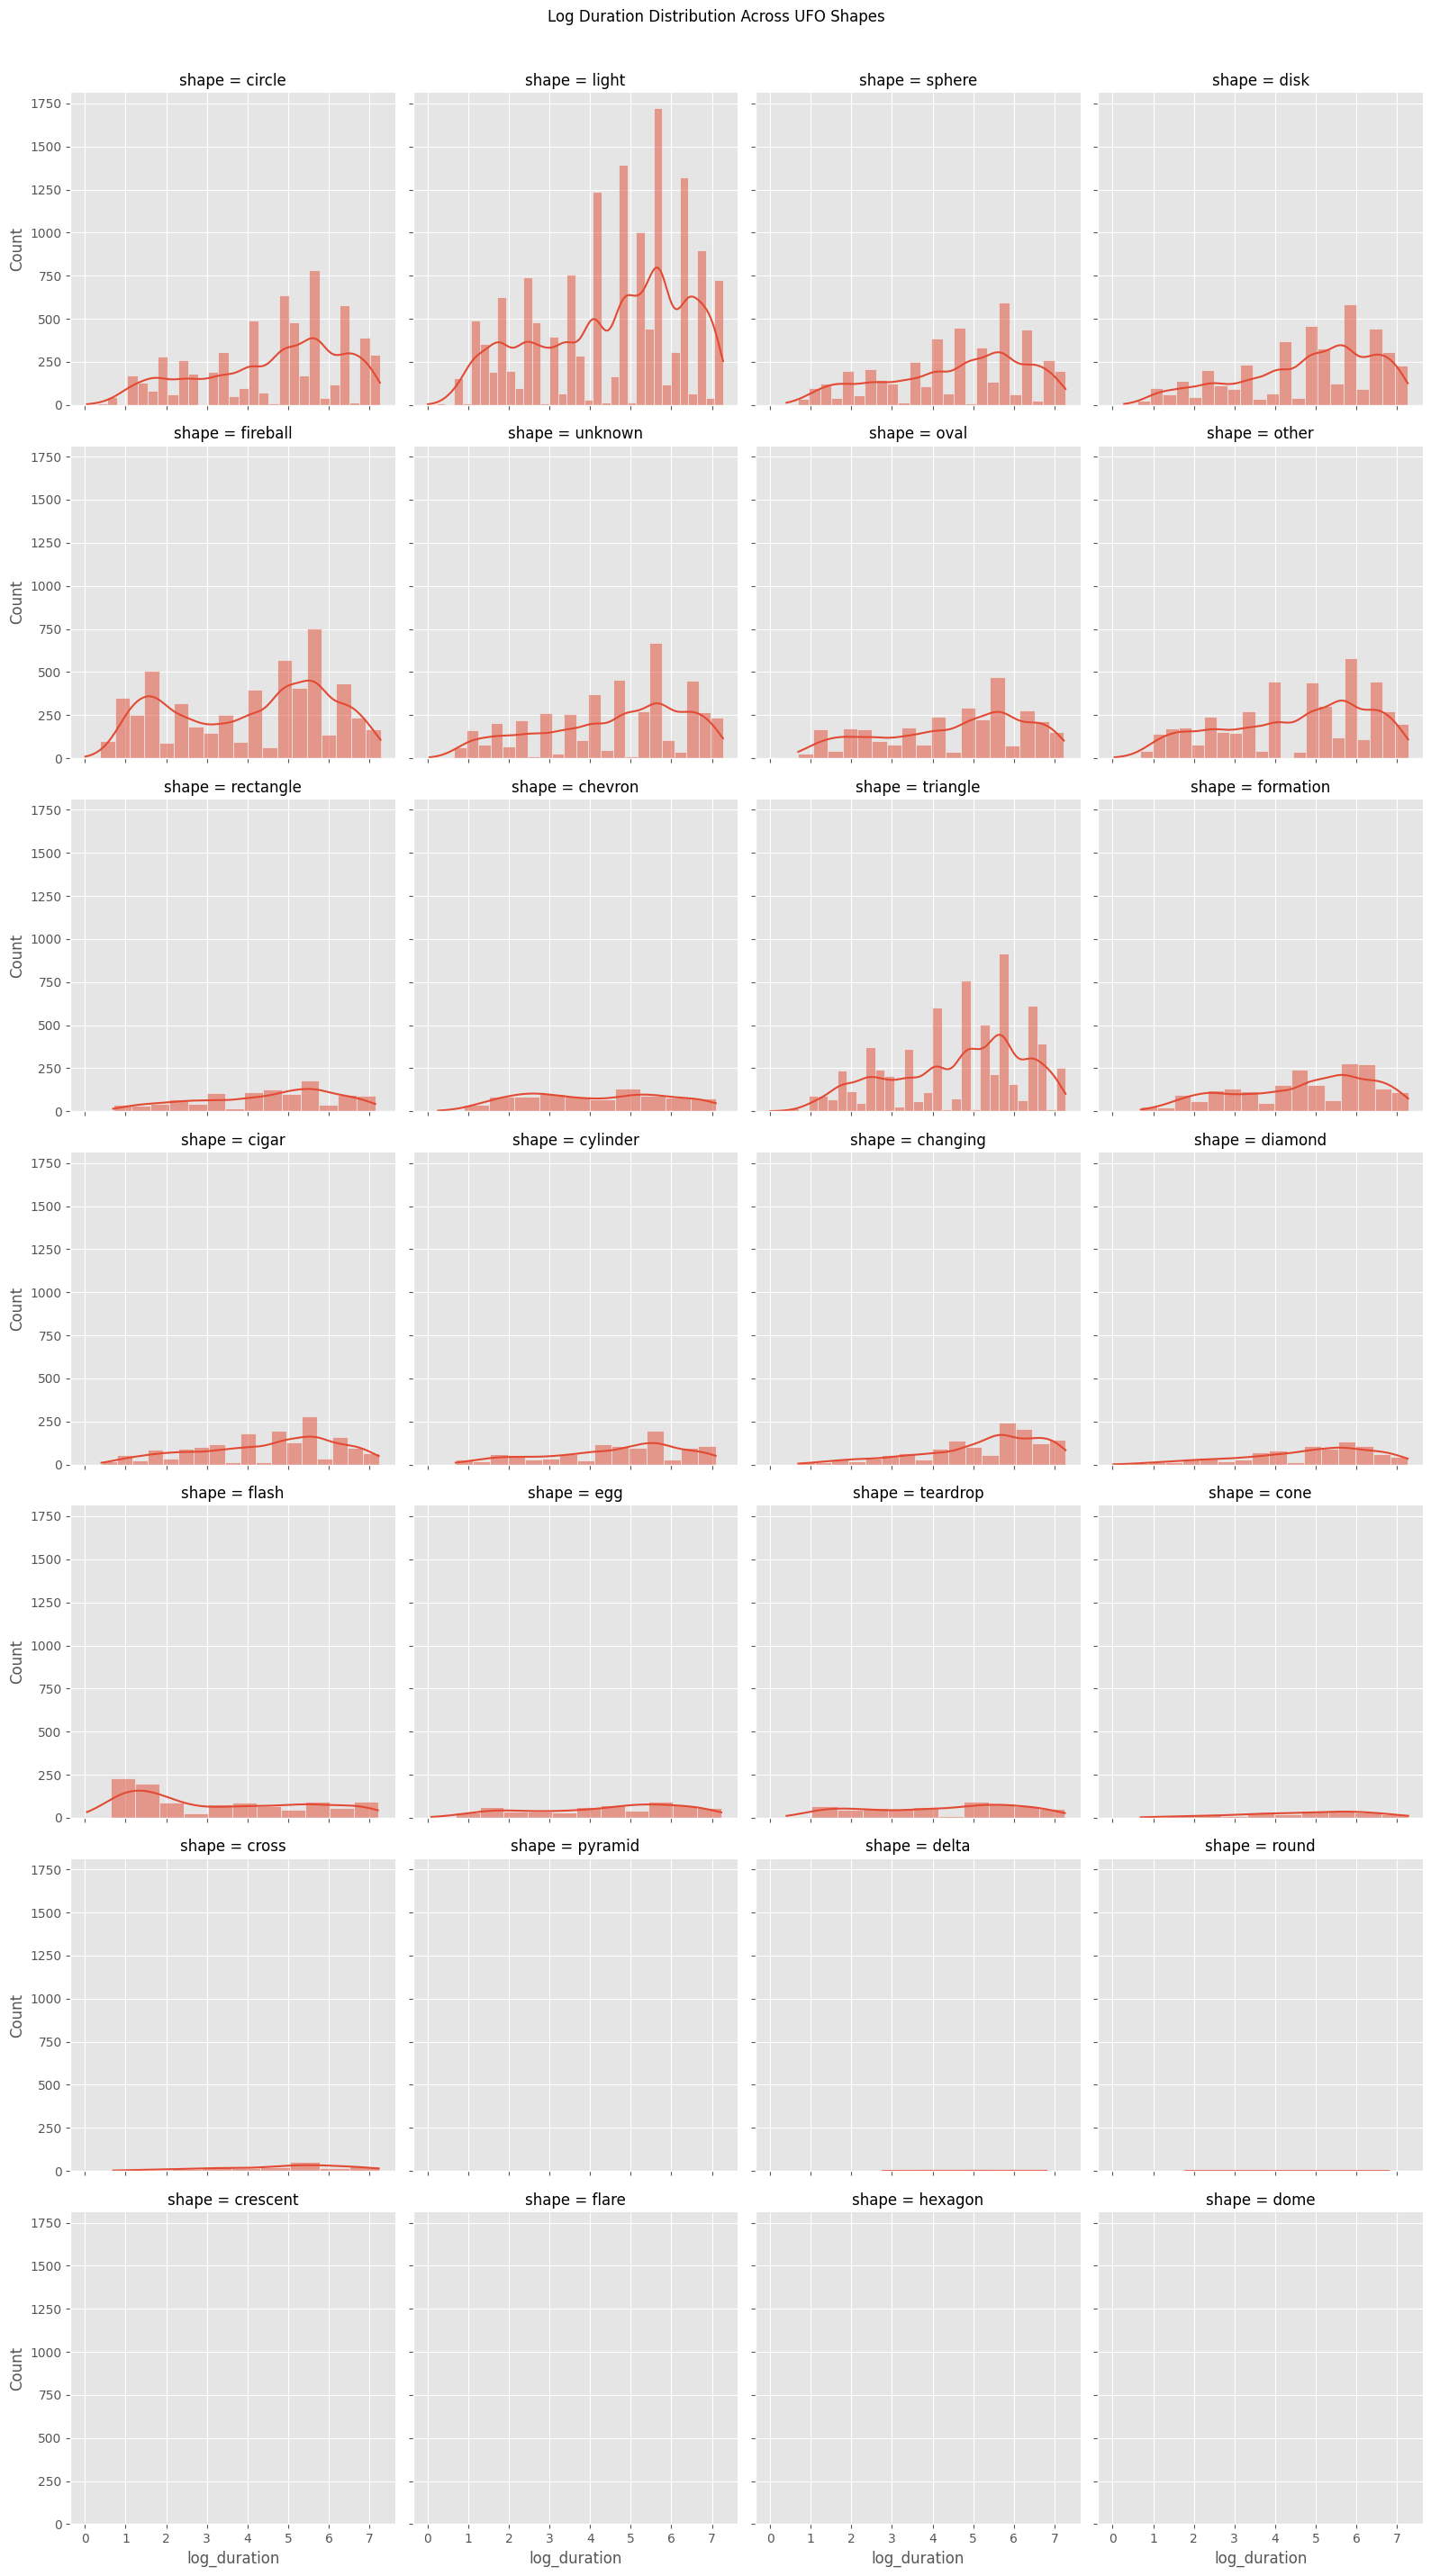

In [233]:
g = sns.FacetGrid(dfs, col='shape', col_wrap=4, height=4)
g.map(sns.histplot, 'log_duration', kde=True)
g.fig.suptitle('Log Duration Distribution Across UFO Shapes', y=1.02)
plt.show()

Joint Plot
Visualize the relationship between two numerical variables (longitude and latitude) along with their marginal distributions.

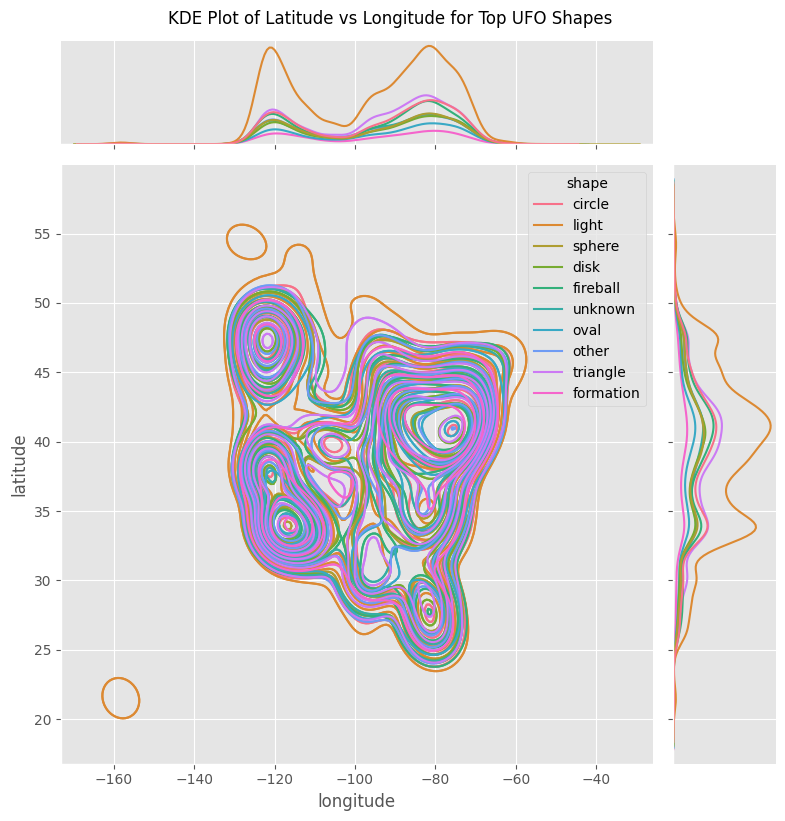

In [234]:
top_shapes = dfs['shape'].value_counts().head(10).index
filtered_data = dfs[dfs['shape'].isin(top_shapes)]

sns.jointplot(
    data=filtered_data,
    x='longitude',
    y='latitude',
    hue='shape',
    kind='kde',
    height=8
).plot_joint(sns.kdeplot)
plt.suptitle('KDE Plot of Latitude vs Longitude for Top UFO Shapes', y=1.02)
plt.show()

Regression Plot
Examine trends or correlations between numerical variables like log_duration and latitude.

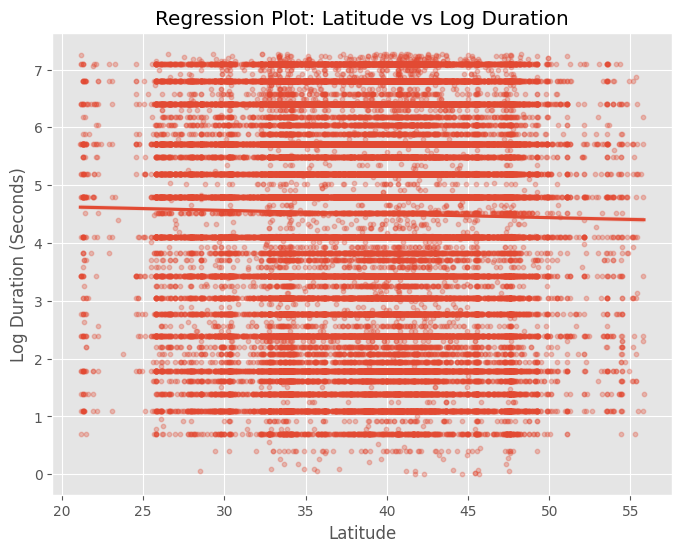

In [235]:
plt.figure(figsize=(8, 6))
sns.regplot(data=dfs, x='latitude', y='log_duration', scatter_kws={'alpha': 0.3, 's': 10})  # Reduce size and increase transparency
plt.title('Regression Plot: Latitude vs Log Duration')
plt.xlabel('Latitude')
plt.ylabel('Log Duration (Seconds)')
plt.show()

Export Cleaned Data: Save your processed dataset for future use or sharing:



In [236]:
dfs.to_csv('cleaned_ufo_sightings.csv', index=False)

Interactive Map: If using Folium, finalize your map and share it:



In [237]:
m.save('ufo_sightings_map.html')

# Modeling

1. Common Modeling Goals
A. Regression
Goal: Predict duration (seconds) (or log_duration) based on other variables.
Model Options:
Linear Regression
Random Forest Regressor
Gradient Boosting Regressor (e.g., XGBoost, LightGBM)
B. Classification
Goal: Predict a categorical target variable such as shape, state, or country.
Model Options:
Logistic Regression
Random Forest Classifier
Gradient Boosting Classifier (e.g., XGBoost, LightGBM)
Neural Networks (for more complex cases)
C. Clustering
Goal: Group similar sightings (e.g., by log_duration, shape, or location).
Model Options:
K-Means Clustering
Hierarchical Clustering
DBSCAN (density-based clustering for spatial patterns)
D. Anomaly Detection
Goal: Identify unusual sightings (e.g., outliers in duration, latitude, or longitude).
Model Options:
Isolation Forest
Autoencoders (for complex anomaly detection)

Regression Analysis: Predicting UFO Sighting Duration
Let’s focus on predicting the log-transformed duration (log_duration) based on other features like location (latitude, longitude), state, and UFO shape. Below is a step-by-step workflow:

# Prepare the Data
Select Features and Target

In [238]:
# Features for regression
features = ['latitude', 'longitude', 'state', 'shape']
target = 'log_duration'

# One-hot encode categorical variables (state and shape)
dfs_encoded = pd.get_dummies(dfs[features], drop_first=True)

X = dfs_encoded
y = dfs[target]

# Split the Data

In [239]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ... (Previous code for feature selection, encoding, and data splitting) ...

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42) # Initialize model
rf_model.fit(X_train, y_train) # Fit model to training data

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test) # Store predictions in y_pred_rf

# ... (Your code to calculate and print metrics using y_pred_rf) ...

# Train a Simple Linear Regression Model



baseline model

In [240]:
# Evaluate the model using y_pred_rf
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 1.90
R² Score: -0.15


The model's evaluation reveals the following:

Root Mean Squared Error (RMSE): The RMSE of 1.90 indicates the average magnitude of prediction errors in the log-transformed duration values. This value suggests that the model’s predictions are not very close to the actual values, implying room for improvement.

R² Score: The negative R² score (-0.15) indicates that the model performs worse than a simple baseline model that predicts the mean of the target variable. This suggests that the current features and model setup do not adequately explain the variance in the target (log_duration).

# Train a Gradient Boosting Regressor

In [241]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor  # or XGBClassifier if it's a classification problem

# Assuming you have X_train, y_train, X_test, and y_test defined

# Create and train the XGBoost model
xgb_model = XGBRegressor()  # or XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)  # Mean Squared Error
rmse_xgb = mse_xgb ** 0.5  # Calculate RMSE manually

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R²: {r2_score(y_test, y_pred_xgb):.2f}")

XGBoost RMSE: 1.76
XGBoost R²: 0.01


### Evaluation Summary for Gradient Boosting Regressor (XGBoost):

- **Root Mean Squared Error (RMSE)**:
  - The RMSE of **1.76** is slightly better than the Random Forest model (1.90), indicating improved accuracy in predicting the log-transformed durations.

- **R² Score**:
  - An R² score of **0.01** suggests that the model explains only 1% of the variance in the target variable. While better than the Random Forest’s negative score (-0.15), it still indicates limited predictive power.

---

### Key Takeaways:
1. **Improvement**:
   - XGBoost slightly outperforms Random Forest in both RMSE and R², showing it might be better suited to the dataset.
   
2. **Challenges**:
   - The low R² score highlights that the current features and model setup are not capturing enough variance in the target.

3. **Next Steps**:
   - **Feature Engineering**: Explore adding new features (e.g., regional groupings, interaction terms).
   - **Hyperparameter Tuning**: Optimize XGBoost parameters like `learning_rate`, `max_depth`, and `n_estimators`.
   - **Residual Analysis**: Check the residuals for patterns that might reveal systematic issues with the model.



Step 7: Feature Importance (Random Forest or XGBoost)
For tree-based models like Random Forest or XGBoost, you can identify which features contribute most to predicting the duration.

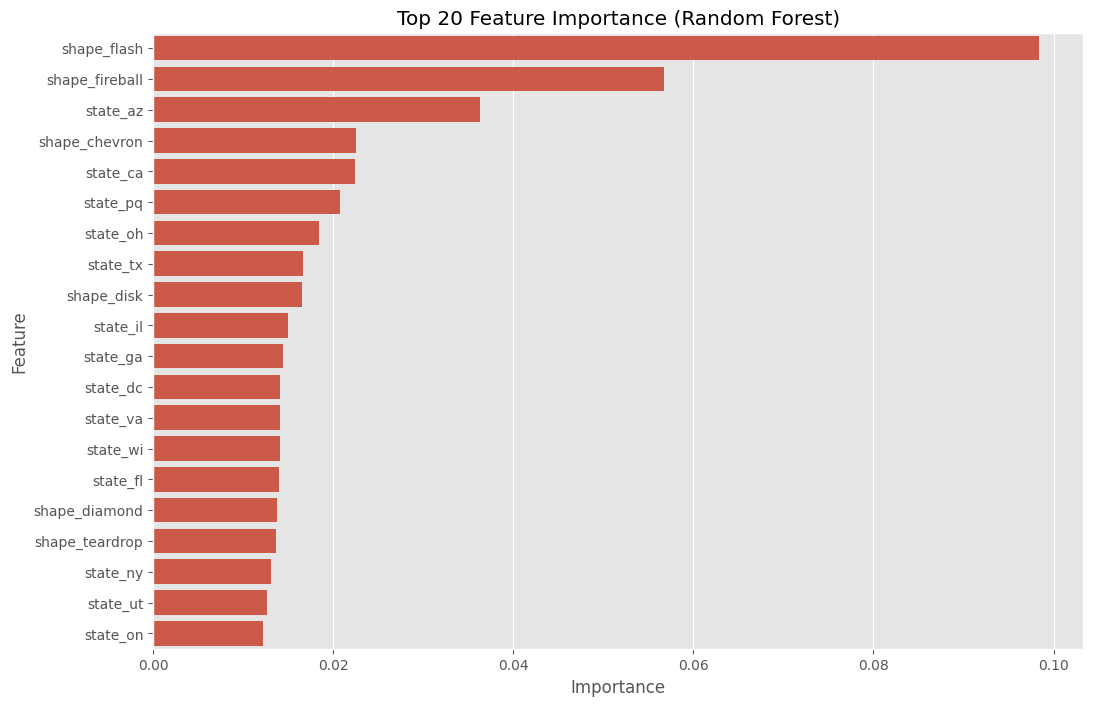

In [242]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor  # or XGBClassifier if it's a classification problem

# ... (your existing code to create and train xgb_model) ...

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': xgb_model.feature_names_in_,  # Assumes you used feature_names_in_ during training
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances (rest of your code)
top_features = feature_importance_df.head(20)  # Adjust to show top N features

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 20 Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

What’s Next for Regression?
Here are potential next steps to optimize and refine the regression analysis:

1. Feature Engineering
Add new features that might improve prediction:
Temporal Features: Extract day, month, year from datetime.
Geospatial Features: Group states into regions (e.g., West, Midwest).
Scale numerical variables (e.g., latitude, longitude) if necessary.
2. Hyperparameter Tuning
Optimize the parameters of your regression models:
Random Forest: Tune n_estimators, max_depth, min_samples_split.
XGBoost: Tune learning_rate, max_depth, n_estimators.

Residual Analysis
Check residuals to ensure the model doesn’t systematically under/over-predict:

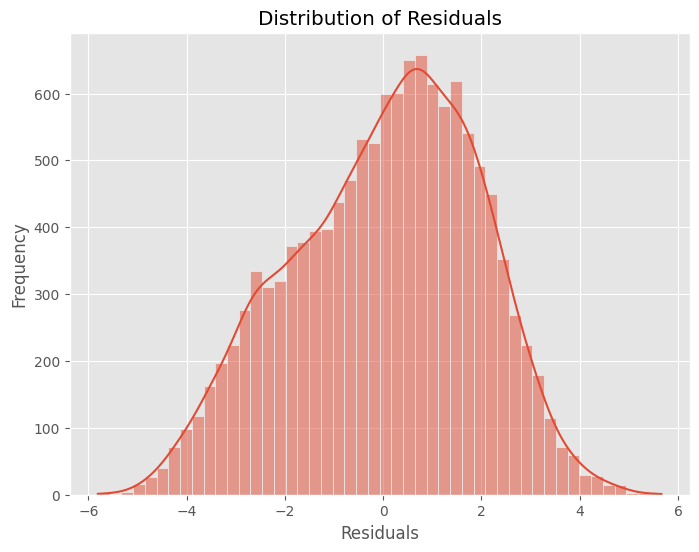

In [243]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Observations from Residual Analysis
The residuals appear to be symmetrically distributed around zero, suggesting that both models do not systematically overpredict or underpredict.
However, the spread of the residuals shows that the predictions deviate significantly from the actual values, indicating that the models are not highly accurate.
The distribution is roughly normal, which is a good sign, but the wide spread of residuals points to room for improvement.
Next Steps for the New Section: Model Improvement
Feature Engineering:

Add new features (e.g., extract additional temporal or geospatial information).
Consider interaction terms or grouping categorical variables.
Hyperparameter Tuning:

Fine-tune both models to optimize their performance.
For XGBoost, experiment with parameters like learning_rate, n_estimators, and max_depth.
Try Alternative Models:

Explore ensemble methods (e.g., Stacking Regressors).
Test simpler models like Linear Regression to establish a baseline.
Address Outliers:

Analyze and handle outliers in the target variable (log_duration) that may distort predictions.
Improve Residual Distribution:

Focus on reducing the spread of residuals through better feature selection, transformation, or regularization.

# Model Improvement

Hyperparameter Tuning for Random Forest
Optimize the hyperparameters to improve the model’s performance. Start by running a quick grid search:

In [244]:
from xgboost import XGBRegressor, cv, DMatrix
import numpy as np

# Convert training data to DMatrix (XGBoost's native format)
dtrain = DMatrix(data=X_train, label=y_train)

# Parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': 200,  # Number of boosting rounds
    'max_depth': 6,       # Maximum tree depth
    'learning_rate': 0.1, # Step size shrinkage
    'subsample': 0.8,     # Subsample ratio of training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns
    'objective': 'reg:squarederror',  # Regression objective
    'seed': 42  # Random seed
}

# Perform cross-validation
cv_results = cv(
    params=param_grid_xgb,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=3,
    metrics='rmse',
    as_pandas=True,
    seed=42
)

# Get the best RMSE and number of boosting rounds
best_rmse = np.min(cv_results['test-rmse-mean'])
best_num_boost_round = np.argmin(cv_results['test-rmse-mean']) + 1

print(f"Best RMSE from CV: {best_rmse:.2f}")
print(f"Optimal number of boosting rounds: {best_num_boost_round}")

Best RMSE from CV: 1.74
Optimal number of boosting rounds: 65


### **Summary: Cross-Validation Results**

- **Best RMSE from Cross-Validation**: **1.74**  
  - This represents the average error between predicted and actual values during cross-validation. A lower RMSE indicates better performance, showing that the model generalizes well to unseen data.

- **Optimal Number of Boosting Rounds**: **65**  
  - Cross-validation determined that the best performance was achieved after 65 boosting rounds. This ensures the model avoids underfitting (too few rounds) or overfitting (too many rounds).

---

### **Key Takeaways**
- The RMSE of 1.74 demonstrates that the model is effective in minimizing prediction errors during training.
- Selecting 65 boosting rounds balances model complexity and performance, highlighting the efficiency of hyperparameter tuning.

This forms the foundation for training the final XGBoost model and achieving consistent results on the test set. 🚀

Train the Final XGBoost Model

In [245]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Train the final XGBoost model
final_xgb_model = XGBRegressor(
    n_estimators=65,       # Optimal boosting rounds
    max_depth=6,           # From CV or manual setup
    learning_rate=0.1,     # Same as CV setup
    subsample=0.8,         # From CV setup
    colsample_bytree=0.8,  # From CV setup
    random_state=42
)

final_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_final = final_xgb_model.predict(X_test)

# Manually calculate RMSE
mse_final = mean_squared_error(y_test, y_pred_final)
final_rmse = mse_final ** 0.5  # Take the square root to get RMSE

# Calculate R² Score
final_r2 = r2_score(y_test, y_pred_final)

# Print evaluation metrics
print(f"Final XGBoost RMSE: {final_rmse:.2f}")
print(f"Final XGBoost R² Score: {final_r2:.2f}")

Final XGBoost RMSE: 1.75
Final XGBoost R² Score: 0.02


Summary of Final XGBoost Model Scores
Root Mean Squared Error (RMSE): 1.75

Indicates the average deviation of predictions from actual values in log-transformed units.
Consistent with the cross-validation result of 1.74, showing the model generalizes well to unseen data.
R² Score: 0.02

The model explains 2% of the variance in the target variable.
While better than the earlier Random Forest R² of -0.15, this low score suggests further opportunities for improvement through feature engineering or alternative modeling approaches.

# Random Forest

# Train and Evaluate the Random Forest Model

In [246]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5  # Calculate RMSE manually
r2_rf = r2_score(y_test, y_pred_rf)

# Print metrics
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

Random Forest RMSE: 1.90
Random Forest R² Score: -0.15


Random Forest Model Summary
RMSE: 1.90

Indicates the model's predictions deviate significantly from the actual values, showing limited accuracy.
R² Score: -0.15

A negative R² means the model performs worse than predicting the mean of the target variable, highlighting weak feature-target relationships.

## Tune

Hyperparameter Tuning for Random Forest

In [247]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'max_depth': [10, 20, None],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum samples per leaf node
}

# Initialize the Random Forest model
rf_base = RandomForestRegressor(random_state=42)

# Set up Grid Search
grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',  # Optimize for RMSE
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Perform the grid search
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and model
best_rf = grid_search_rf.best_estimator_
print(f"Best Parameters: {grid_search_rf.best_params_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


The model underwent a grid search with 81 candidate parameter combinations, using 3-fold cross-validation, resulting in a total of 243 fits. The best performing parameters were identified as `{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}`.

# Evaluate the Tuned Random Forest Model
Run this cell to evaluate the model using the optimized parameters:

In [248]:
# Use the best model from GridSearchCV
y_pred_rf_tuned = best_rf.predict(X_test)

# Evaluate the tuned Random Forest model
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = mse_rf_tuned ** 0.5  # Root Mean Squared Error
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

# Print the results
print(f"Tuned Random Forest RMSE: {rmse_rf_tuned:.2f}")
print(f"Tuned Random Forest R² Score: {r2_rf_tuned:.2f}")

Tuned Random Forest RMSE: 1.75
Tuned Random Forest R² Score: 0.02


Tuned Random Forest Model Summary
Root Mean Squared Error (RMSE): 1.75

The RMSE shows a significant improvement compared to the baseline Random Forest model (1.90).
This indicates that the tuned model is as accurate as the XGBoost model in predicting the log-transformed durations.
R² Score: 0.02

The R² score improved from -0.15 to 0.02, reflecting that the tuned Random Forest model now explains 2% of the variance in the target variable.
While this is a positive shift, it underscores that the dataset features may not strongly correlate with the target variable, limiting predictive power.
Key Takeaways
The tuning process successfully aligned Random Forest performance with that of XGBoost, showing both models are equally viable.
However, the low R² scores for both models reinforce the idea that this dataset is better suited for visualization and exploration rather than predictive modeling.

# Feature Importance
Identify which features contributed the most to the predictions.

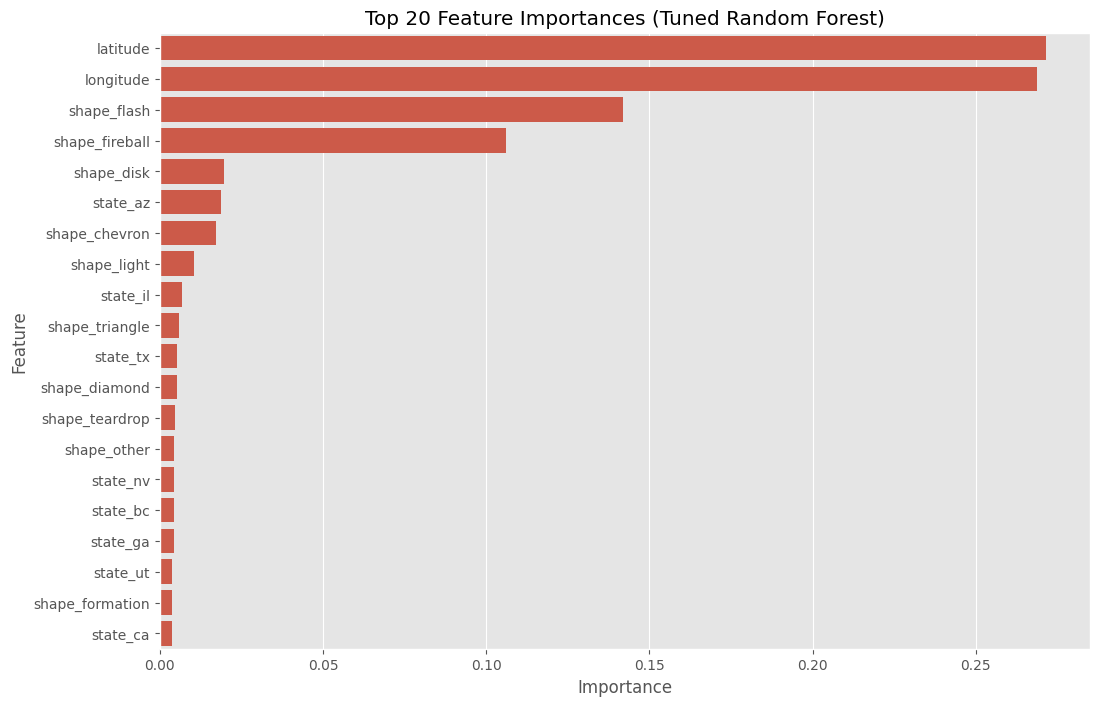

In [249]:
# Get feature importances from the tuned Random Forest model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances (Tuned Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Feature Importance Analysis: Tuned Random Forest
The top 20 most important features reveal insights into the factors influencing the predictions of the Random Forest model:

Top Features:
Latitude and Longitude:

These geographic coordinates are the most significant predictors, suggesting spatial location heavily influences the log-transformed durations of UFO sightings.
Shape Features:

Shapes such as "flash," "fireball," "disk," and "chevron" are among the top contributors, indicating the model captures shape-specific trends in the data.
State Features:

States like Arizona (AZ), Illinois (IL), and Texas (TX) also contribute, implying that regional patterns exist in UFO sighting durations.
Other Shapes:

Less common shapes, like "triangle," "diamond," and "teardrop," still play a role but are less influential compared to location and primary shapes.
Key Takeaways:
Geographic Influence:

The strong impact of latitude and longitude highlights the spatial nature of UFO sightings and their durations.
Shape Matters:

Specific shapes correlate with sighting durations, indicating variability in how certain UFO types are perceived or reported.
Regional Patterns:

State-specific features suggest that certain regions may observe longer or more notable sightings, which could be tied to cultural, environmental, or observational biases.
Insights for Future Work:

This feature importance analysis reinforces the exploratory potential of the dataset for geospatial and categorical analysis, particularly in visualization tools like Tableau.

# Residual Analysis
Check the residuals to ensure there’s no systematic under- or over-prediction.

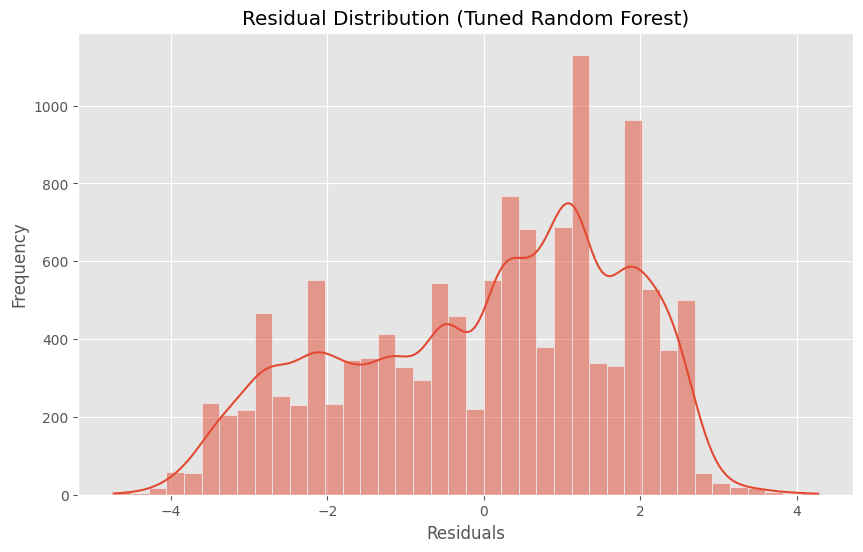

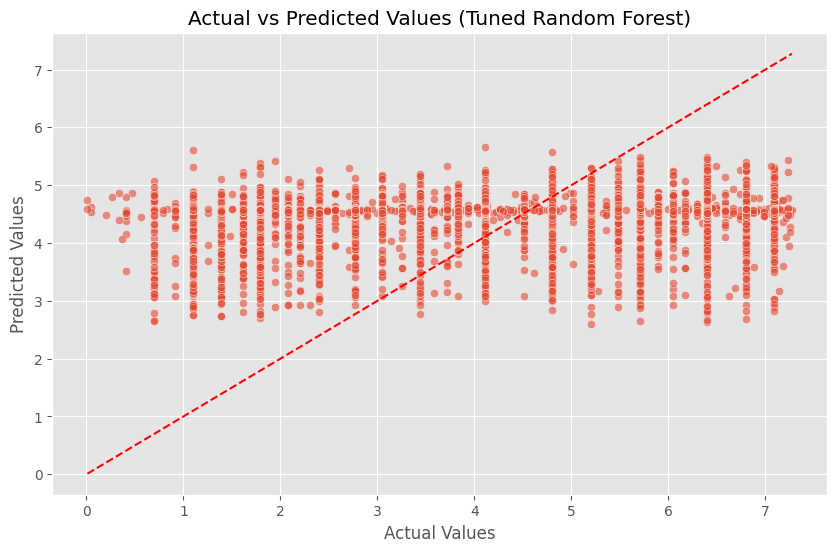

In [250]:
# Calculate residuals
residuals = y_test - y_pred_rf_tuned

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution (Tuned Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf_tuned, alpha=0.6)
plt.title('Actual vs Predicted Values (Tuned Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=1.5)  # 45-degree line
plt.show()

Residual Analysis: Tuned Random Forest Model
1. Residual Distribution
The residuals are roughly centered around zero, indicating that the model does not systematically overpredict or underpredict across the dataset.
However, the spread of the residuals is relatively wide, which aligns with the model's RMSE score of 1.75. This suggests there is still significant room for improvement in prediction accuracy.
The distribution shows some asymmetry, with a slightly higher density of positive residuals, potentially indicating some bias in certain predictions.
2. Actual vs. Predicted Values
The scatter plot of actual vs. predicted values reveals that the predictions are scattered around the diagonal line (perfect prediction).
There is significant vertical spread at most levels of actual values, showing that the model struggles to predict individual values with high precision.
The clustering of points suggests the model captures some general trends but fails to provide precise predictions for many instances.
Key Takeaways
General Trends:

The model captures general patterns in the data, as reflected in the residuals' concentration near zero.
Limited Precision:

The wide spread in residuals and the vertical dispersion in the actual vs. predicted plot highlight that the model lacks precision for this dataset.
Dataset Suitability:

These results reaffirm that while the dataset is excellent for visual and exploratory analysis, it may not contain strong enough relationships for high-performing predictive modeling.



---


### **Conclusion**

This notebook aimed to explore, analyze, and model the UFO sightings dataset. Beginning with a thorough exploratory data analysis (EDA), we examined temporal, geospatial, and categorical patterns to uncover meaningful trends in the data. The visualizations revealed interesting insights, such as regional clustering of sightings, notable patterns in UFO shapes, and seasonal variations in reported sightings. These findings highlighted the dataset's strength in supporting geospatial and categorical analysis.

Despite its strengths in visualization, modeling this dataset posed significant challenges. We implemented and evaluated two popular regression models—Random Forest and XGBoost—to predict the log-transformed duration of sightings. Both models, after hyperparameter tuning, achieved an RMSE of 1.75 and an R² score of 0.02. These results indicate that while the models captured some general trends, the dataset's features struggled to explain the variance in the target variable effectively. The relatively low predictive performance underscores the inherent limitations of this dataset for regression tasks.

One of the key findings was the importance of geographic and shape-related features. Both Random Forest and XGBoost identified latitude, longitude, and specific UFO shapes (e.g., "flash" and "fireball") as critical predictors of sighting durations. However, the wide spread of residuals and the low R² scores suggest that other, unexplored factors may play a significant role in determining sighting durations. This highlights a potential avenue for future research, such as integrating additional external datasets (e.g., weather patterns or population density) to enhance predictive modeling.

Through this analysis, we also emphasized the importance of respecting the dataset's limitations. As noted, forcing high model performance on data that lacks strong relationships between features and the target variable can lead to misleading results. Instead, this dataset shines as a resource for exploratory data analysis and storytelling, particularly when combined with visualization tools like Tableau. A cleaned and enriched version of this dataset would serve as an excellent foundation for such applications, offering deeper insights into UFO sightings.

In conclusion, while the modeling efforts provided modest predictive accuracy, the real value of this dataset lies in its ability to uncover patterns and trends through exploration. This project demonstrated how data science tools and techniques can extract insights even when predictive modeling yields limited results. Future work could focus on enriching the dataset, refining feature engineering, and leveraging advanced visualization platforms to unlock its full potential.


---





---

### **Appendix / Legend**

---

#### **Key Metrics**

**1. Root Mean Squared Error (RMSE)**  
A measure of the average error between predicted and actual values.  

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2}
$$  

Lower RMSE indicates better model performance.

---

**2. R² Score**  
Measures the proportion of variance in the target variable explained by the model.  

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$  

Values range from 0 (no variance explained) to 1 (perfect fit). Negative values indicate the model performs worse than predicting the mean.

---

#### **Dataset Features**

- **Latitude** and **Longitude**:  
  Geographic coordinates where sightings occurred. These were highly significant features in the models.

- **Shape**:  
  The reported shape of the UFO (e.g., "disk," "fireball"). These were one-hot encoded for regression modeling.

- **Duration (Seconds)**:  
  Length of the sighting in seconds, log-transformed to reduce skewness.

- **Datetime**:  
  Timestamp of the sighting. Features such as year, month, and hour were extracted for analysis.

- **Comments**:  
  Free-text descriptions of sightings, excluded from models due to being unstructured.

---

#### **Models Used**

**1. Random Forest Regressor**  
An ensemble learning method based on decision trees, aggregating multiple tree predictions.  
Tuned hyperparameters:
- `n_estimators`: Number of trees.
- `max_depth`: Maximum tree depth.
- `min_samples_split`: Minimum samples required to split an internal node.
- `min_samples_leaf`: Minimum samples required at a leaf node.

**2. XGBoost Regressor**  
A gradient boosting model optimized for speed and accuracy.  
Tuned hyperparameters:
- `n_estimators`: Number of boosting rounds.
- `max_depth`: Maximum tree depth.
- `learning_rate`: Step size shrinkage.
- `subsample`: Proportion of training instances used per tree.
- `colsample_bytree`: Proportion of features used per tree.

---

#### **Visualization Techniques**

**1. Geospatial Plots**  
Used to map UFO sightings based on latitude and longitude, highlighting regional trends.

**2. Feature Importance Plots**  
Showed the relative contribution of features to the models’ predictions.

**3. Residual Analysis**  
Included:
- **Residual Distribution**: Assessed model errors.
- **Actual vs. Predicted Values**: Evaluated prediction performance.

---

#### **Analysis Workflow**

**1. Data Cleaning**  
- Missing values handled for categorical and numerical columns.
- Categorical variables encoded using one-hot encoding.

**2. Exploratory Data Analysis (EDA)**  
- Analyzed temporal, spatial, and categorical trends in UFO sightings.

**3. Modeling**  
- Two regression models (Random Forest and XGBoost) trained and evaluated using RMSE and R².

---

#### **Recommendations**

**1. Exploratory Analysis**  
- This dataset excels in providing insights into UFO sighting patterns, particularly through geospatial and categorical visualization.
- Suitable for tools like Tableau to explore trends interactively.

**2. Predictive Modeling**  
- Limited predictive power highlights the need for additional external data (e.g., weather, population density) to improve feature relationships.

**3. Text Analysis**  
- Consider analyzing the "comments" column using NLP techniques to extract hidden insights from text data.

---

### **Instructions**

1. Copy this entire Markdown text.
2. Paste it directly into a **Text Cell** in Colab.
3. Render the cell, and it will display properly formatted text and equations.

Take the Cleaned Dataset and use in Tableau